# Prosper Loan Data Visualization Project - Exploration

# Table of Contents

- [Wrangling Data for Exploration](#wde)
- [Univariate Analysis](#uva)
- [Bivariate Analysis](#bva)
- [Multivariate Analysis](#mva)

In [1]:
#import statements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Wrangling Data for Exploration

<a id="wde"></a>

In [2]:
#loading csv.data into main and examing first five rows

df_main = pd.read_csv('prosperLoanData.csv')
df_main.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [3]:
#examing columns/datatypes using info() command

df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
#Creating list for columns I want to use for analysis and visualizations

column_list = ['ListingKey', 'CreditGrade', 'LoanStatus', 'BorrowerRate', 'EmploymentStatus', 'IsBorrowerHomeowner',
              'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'IncomeRange', 'LoanCurrentDaysDelinquent',
              'LoanOriginalAmount', 'EmploymentStatusDuration', 'CurrentCreditLines', 'CurrentDelinquencies', 
               'DebtToIncomeRatio']

In [5]:
#copying main dataframe to wrangle for exploration

df_main_explore = df_main.copy()

In [6]:
#Modifying exploring dataframe to contain the columns I want for analysis

df_main_explore = df_main_explore[column_list]

In [7]:
#Combining columns from CreditScoreRangeLower and CreditScoreRangeUpper into one column depicting range
#Filling null values with 0

df_main_explore['CreditScoreRangeLower'].fillna(0, inplace=True)
df_main_explore['CreditScoreRangeUpper'].fillna(0, inplace=True)

In [8]:
df_main_explore = df_main_explore.query('CreditScoreRangeLower > 350')

In [9]:
#Converting both columns to integer datatypes to drop .0
df_main_explore['CreditScoreRangeLower'] = df_main_explore['CreditScoreRangeLower'].astype(int)
df_main_explore['CreditScoreRangeUpper'] = df_main_explore['CreditScoreRangeUpper'].astype(int)

In [10]:
df_main_explore = df_main_explore.reset_index(drop=True)

In [11]:
#Converting values by multiples divisible by 40

for x in range(df_main_explore.shape[0]):
    result1 = 0
    result2 = 0
    value1 = df_main_explore['CreditScoreRangeLower'][x]
    value2 = df_main_explore['CreditScoreRangeUpper'][x]
    
    if value1 % 40 == 20:
        result1 -= 20
    if (value2 % 40 == 19) & (value2 != 899):
        result2 += 20
        
    result1 += value1
    result2 += value2
    df_main_explore['CreditScoreRangeLower'][x] = result1
    df_main_explore['CreditScoreRangeUpper'][x] = result2

<ipython-input-11-c6a3eaf5e75b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_explore['CreditScoreRangeLower'][x] = result1
<ipython-input-11-c6a3eaf5e75b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_explore['CreditScoreRangeUpper'][x] = result2


In [12]:
#Looking at unique values in ListingKey column to find and remove any duplicates

duplicates = df_main_explore['ListingKey'].duplicated()
duplicates.value_counts()

False    112342
True        871
Name: ListingKey, dtype: int64

In [13]:
#Removing duplicates rows from dataset only keeping first value of ListingKey

df_main_explore = df_main_explore.drop_duplicates(subset = 'ListingKey', keep='first')

In [14]:
#resetting index
df_main_explore = df_main_explore.reset_index(drop=True)

In [15]:
#Converting both columns to string datatypes

df_main_explore['CreditScoreRangeLower'] = df_main_explore['CreditScoreRangeLower'].astype(str)
df_main_explore['CreditScoreRangeUpper'] = df_main_explore['CreditScoreRangeUpper'].astype(str)

In [16]:
#Creating a new column, CreditScoreRange combining the Lower and Upper columns and using a '-' between both of them

df_main_explore['CreditScoreRange'] = df_main_explore['CreditScoreRangeLower'] + " - " + df_main_explore['CreditScoreRangeUpper']

In [17]:
#Looking at the values in the CreditScoreRange column

df_main_explore['CreditScoreRange'].value_counts()

680 - 719    31630
640 - 679    28276
720 - 759    22008
760 - 799    11173
600 - 639     7773
800 - 839     4044
520 - 559     3067
560 - 599     2482
480 - 519      900
840 - 879      779
440 - 479      177
880 - 899       27
400 - 439        5
360 - 399        1
Name: CreditScoreRange, dtype: int64

In [18]:
#Dropping The lower and upper credit score range columns

df_main_explore.drop(['CreditScoreRangeLower', 'CreditScoreRangeUpper'], axis = 1, inplace = True)

In [19]:
#First five rows after wrangling

df_main_explore.head()

ListingKey CreditGrade LoanStatus  BorrowerRate  \
0  1021339766868145413AB3B           C  Completed        0.1580   
1  10273602499503308B223C1         NaN    Current        0.0920   
2  0EE9337825851032864889A          HR  Completed        0.2750   
3  0EF5356002482715299901A         NaN    Current        0.0974   
4  0F023589499656230C5E3E2         NaN    Current        0.2085   

  EmploymentStatus  IsBorrowerHomeowner     IncomeRange  \
0    Self-employed                 True  $25,000-49,999   
1         Employed                False  $50,000-74,999   
2    Not available                False   Not displayed   
3         Employed                 True  $25,000-49,999   
4         Employed                 True       $100,000+   

   LoanCurrentDaysDelinquent  LoanOriginalAmount  EmploymentStatusDuration  \
0                          0                9425                       2.0   
1                          0               10000                      44.0   
2                          0                3001                       NaN   
3                          0               10000                     113.0   
4                          0               15000                      44.0   

   CurrentCreditLines  CurrentDelinquencies  DebtToIncomeRatio  \
0                 5.0                   2.0               0.17   
1                14.0                   0.0               0.18   
2                 NaN                   1.0               0.06   
3                 5.0                   4.0               0.15   
4                19.0                   0.0               0.26   

  CreditScoreRange  
0        640 - 679  
1        680 - 719  
2        480 - 519  
3        800 - 839  
4        680 - 719

In [20]:
#converting values in IsBorrowerHomeowner to 'Homeowner' if True and 'Not a homeowner' if False
df_main_explore['IsBorrowerHomeowner'] = df_main_explore['IsBorrowerHomeowner'].astype(str)

for val in range(df_main_explore.shape[0]):
    if df_main_explore['IsBorrowerHomeowner'][val] == 'True':
        df_main_explore['IsBorrowerHomeowner'][val] = 'Homeowner'
    else:
        df_main_explore['IsBorrowerHomeowner'][val] = 'Not a homeowner'
        

<ipython-input-20-6db93ce37c8e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_explore['IsBorrowerHomeowner'][val] = 'Homeowner'
<ipython-input-20-6db93ce37c8e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_explore['IsBorrowerHomeowner'][val] = 'Not a homeowner'


In [21]:
#converting columns listed above as categorical to categorical data types

df_main_explore[['CreditGrade', 'LoanStatus']] = df_main_explore[['CreditGrade', 'LoanStatus']].astype('category')
df_main_explore[['CreditScoreRange', 'EmploymentStatus']] = df_main_explore[['CreditScoreRange', 'EmploymentStatus']].astype('category')
df_main_explore[['IsBorrowerHomeowner', 'IncomeRange']] = df_main_explore[['IsBorrowerHomeowner', 'IncomeRange']].astype('category')


In [22]:
#Looking at info and describe methods after wrangled dataframe

df_main_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112342 entries, 0 to 112341
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   ListingKey                 112342 non-null  object  
 1   CreditGrade                28229 non-null   category
 2   LoanStatus                 112342 non-null  category
 3   BorrowerRate               112342 non-null  float64 
 4   EmploymentStatus           110708 non-null  category
 5   IsBorrowerHomeowner        112342 non-null  category
 6   IncomeRange                112342 non-null  category
 7   LoanCurrentDaysDelinquent  112342 non-null  int64   
 8   LoanOriginalAmount         112342 non-null  int64   
 9   EmploymentStatusDuration   105441 non-null  float64 
 10  CurrentCreditLines         105462 non-null  float64 
 11  CurrentDelinquencies       112296 non-null  float64 
 12  DebtToIncomeRatio          103937 non-null  float64 
 13  CreditScoreRan

In [23]:
df_main_explore.describe()

BorrowerRate  LoanCurrentDaysDelinquent  LoanOriginalAmount  \
count  112342.000000              112342.000000       112342.000000   
mean        0.193042                 152.992683         8339.122581   
std         0.074842                 466.141969         6241.253429   
min         0.000000                   0.000000         1000.000000   
25%         0.134600                   0.000000         4000.000000   
50%         0.184000                   0.000000         6500.000000   
75%         0.250600                   0.000000        12000.000000   
max         0.360000                2704.000000        35000.000000   

       EmploymentStatusDuration  CurrentCreditLines  CurrentDelinquencies  \
count             105441.000000       105462.000000         112296.000000   
mean                  96.060584           10.307058              0.593218   
std                   94.432241            5.458196              1.980506   
min                    0.000000            0.000000              0.000000   
25%                   26.000000            7.000000              0.000000   
50%                   67.000000           10.000000              0.000000   
75%                  137.000000           13.000000              0.000000   
max                  755.000000           59.000000             83.000000   

       DebtToIncomeRatio  
count      103937.000000  
mean            0.276890  
std             0.554989  
min             0.000000  
25%             0.140000  
50%             0.220000  
75%             0.320000  
max            10.010000

### What is the structure of the dataset?

This dataset has 112,342 rows with 13 columns with the following variables:

- ListingKey - Reference # to a particular customer (Won't be observed; just used for wrangling)
- CreditGrade (categorical variable)
- LoanStatus (categorical variable - Shows status of a particular loan for each borrower)
- BorrowerRate (numerical variable of the loan borrower's interest rate - Main variable of interest)
- EmploymentStatus (categorical variable for type of employment for borrower)
- IsBorrowerHomeowner (boolean variable if borrower owns a home)
- IncomeRange (categorical variable listing income range of borrower)
- LoanCurrentDaysDelinquent (numerical variable listing how many days loan is delinquent)
- LoanOriginalAmount (numerical variable listing amount of loan)
- EmploymentStatusDuration (numerical variable showing how long borrower is employed)
- CurrentCreditLines (numerical variable listing number of credit lines borrower has currently)
- CurrentDelinquencies (numerical variable listing number of delinquencies a borrower has)
- DebtToIncomeRatio (numerical variable describing how much total debt a borrower has compared to income)
- CreditScoreRange (categorical variable describing credit score range of borrower)

### What is the main feature of interest looking at this dataset?

The main feature of interest is looking at borrower rate and seeing what factors affect a borrower getting a certain rate when acquiring a loan.


### What features in the dataset will support the investigation into the main feature of interest?

To some degree, I feel most of these variables will have some effect to a borrower getting assigned a certain interest rate.  However, I suspect the borrower's credit score would probably have the largest effect for a person getting a certain interest rate. 


## Univariate Exploration

<a id="uva"></a>

C:\Users\westi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


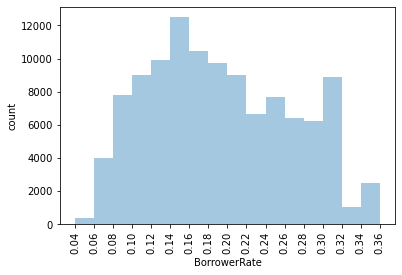

In [24]:
#looking at a simple plot of BorrowerRate with bin edges starting at 0.04 and ending at the max BorrowerRate value

binedges = np.arange(0.04, df_main_explore['BorrowerRate'].max() + 0.02, 0.02)

sns.distplot(df_main_explore['BorrowerRate'], bins = binedges, kde=False);
plt.xticks(binedges, rotation = 90)
plt.ylabel('count');

In [25]:
#looking at outliers below 4% borrower rate
interest_outlier = df_main_explore.query('BorrowerRate < 0.04')
interest_outlier.sort_values('BorrowerRate', axis=0)
interest_outlier.shape

(37, 14)

Looking at this histogram, most of the borrowers fall in the range of 4% to 36% notably with two spikes occuring around 15% and another spike at around 30%.  Looking at outliers, there are only 37 values below 4%

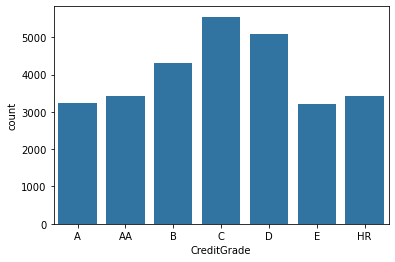

In [26]:
#looking at CreditGrade variable
base_color = sns.color_palette()[0]
sns.countplot(data=df_main_explore, x='CreditGrade', color=base_color);

Looking at this, this might be a variable I probably will not investigate any further.

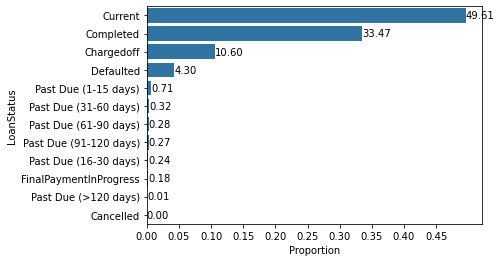

In [27]:
#looking at LoanStatus variable using proportion
#most of this code found in lesson 3: univarate exploration of data

type_counts = df_main_explore['LoanStatus'].value_counts()
order_type = type_counts.index
num_loanstatus = type_counts.sum()
max_counts = type_counts[0]
max_proportion = max_counts / num_loanstatus

tick_pro = np.arange(0, max_proportion, 0.05)
tick_names = ['{:0.2f}'.format(x) for x in tick_pro]

sns.countplot(data=df_main_explore, y='LoanStatus', color=base_color, order=order_type);
plt.xticks(tick_pro * num_loanstatus, tick_names);
plt.xlabel('Proportion');

for x in range (type_counts.shape[0]):
    count = type_counts[x]
    pct_string='{:0.2f}'.format(100*count/num_loanstatus)
    plt.text(count+1, x, pct_string, va='center')
    


For the most part, it shows around 82% either current or completed while the other 18% is either past due, charged off, or defaulted.  It doesn't quite explain the two spikes in the dataset.  It is possible that one borrower had a bad credit history is staying current or completed their loan agreement or a borrower that has a good credit rating might fall behind on their loan payments.  However, if the loan is not in a good status, the loan company may raise the interest rate as the risk is higher.

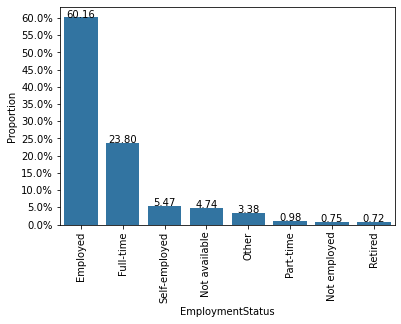

In [28]:
#EmploymentStatus proportion

type_counts = df_main_explore['EmploymentStatus'].value_counts()
order_type = type_counts.index
num_employment_status = type_counts.sum()
max_counts = type_counts[0]
max_proportion = max_counts / num_employment_status

tick_pro = np.arange(0, max_proportion, 0.05)
tick_names = ['{:0.1%}'.format(x) for x in tick_pro]

sns.countplot(data=df_main_explore, x='EmploymentStatus', color=base_color, order = order_type);
plt.xticks(rotation=90)
plt.yticks(tick_pro * num_employment_status, tick_names);
plt.ylabel('Proportion');

for x in range (type_counts.shape[0]):
    count = type_counts[x]
    pct_string='{:0.2f}'.format(100*count/num_employment_status)
    plt.text(x, count+1, pct_string, ha='center')


This graph shows most people (at least 90%) are employed in some fashion, it might not explain the two spikes in interest rate.

In [29]:
order = df_main_explore['IncomeRange'].value_counts().index.sort_values()
order

CategoricalIndex(['$0', '$1-24,999', '$100,000+', '$25,000-49,999',
                  '$50,000-74,999', '$75,000-99,999', 'Not displayed',
                  'Not employed'],
                 categories=['$0', '$1-24,999', '$100,000+', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', 'Not displayed', 'Not employed'], ordered=False, dtype='category')

In [30]:
#reordering manually for graph

order2 = ['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x']
for count,value in enumerate(order):
    if (count <= 1) | (count >= 6):
        order2[count] = value
    elif count == 2:
        order2[5] = value
    else:
        order2[count-1] = value
order2
        

['$0',
 '$1-24,999',
 '$25,000-49,999',
 '$50,000-74,999',
 '$75,000-99,999',
 '$100,000+',
 'Not displayed',
 'Not employed']

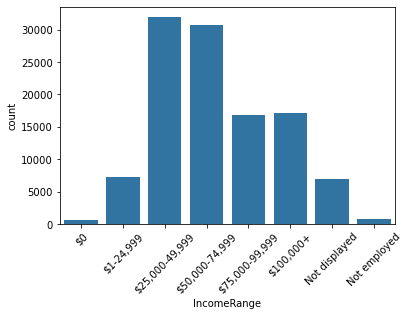

In [31]:
#IncomeRange
order = df_main_explore['IncomeRange'].value_counts().index.sort_values()
sns.countplot(data=df_main_explore, x='IncomeRange', color=base_color, order=order2);
plt.xticks(rotation=45);

It looks like most borrowers make at least $25,000, this might have some correlation to interest rate.  It might be worth investigating against interest rate to see some kind of correlation.

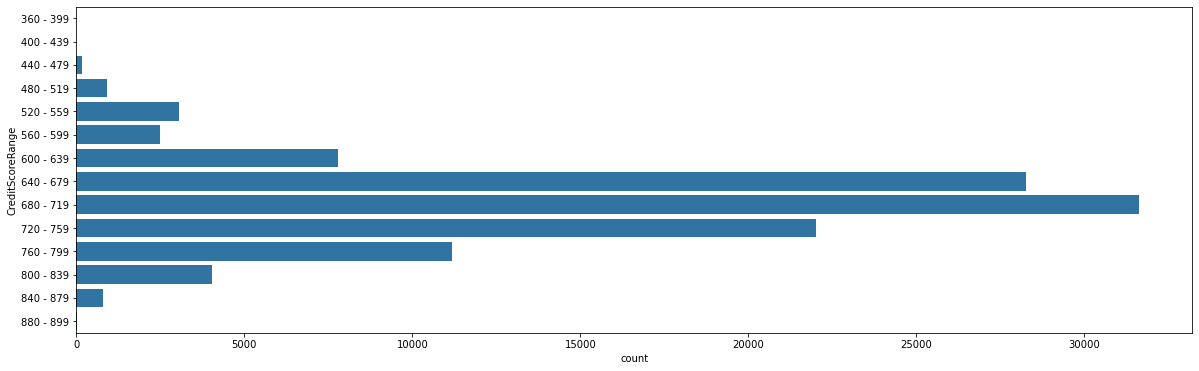

In [32]:
#CreditScoreRange
plt.figure(figsize=[20,6])
sns.countplot(data=df_main_explore, y='CreditScoreRange', color=base_color);


Looking at credit scores, I suspect there might be a correlation as most borrowers have between 600-800 credit score.  It could definitely be one factor explaining the two spikes in interest rate.

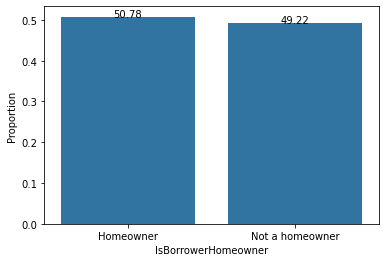

In [33]:
#IsBorrowerHomeowner proportion
type_count = df_main_explore['IsBorrowerHomeowner'].value_counts()
order_type = type_count.index
n_homeowner = type_count.sum()
max_count = type_count[0]
max_prop = max_count / n_homeowner
tick_pro = np.arange(0, max_prop, 0.1)
tick_names = ['{:0.1f}'.format(x) for x in tick_pro]

sns.countplot(data=df_main_explore, x='IsBorrowerHomeowner', color=base_color, order=order_type);
plt.yticks(tick_pro*n_homeowner, tick_names);
plt.ylabel('Proportion');

for x in range (type_count.shape[0]):
    count = type_count[x]
    pct_string='{:0.2f}'.format(100*count/n_homeowner)
    plt.text(x, count+1, pct_string, ha='center')



This shows that a little more than half are homeowners.  It might affect assigned interest rate as there is less risk if a borrower is a homeowner.

C:\Users\westi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


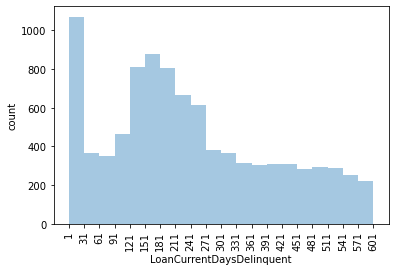

In [34]:
#LoanCurrentDaysDelinquent between 1 day and 601 days

binedges = np.arange(1, 600 + 30, 30)

sns.distplot(df_main_explore['LoanCurrentDaysDelinquent'], bins = binedges, kde=False);
plt.xticks(binedges, rotation = 90)
plt.ylabel('count');


Having a current loan that is delinquent would raise the assigned interest rate as there is a greater risk that the loan company may not get their money.

In [35]:
#Logarimithic distribution of LoanOriginalAmount
np.log10(df_main_explore['LoanOriginalAmount'].describe())

count    5.050542
mean     3.921120
std      3.795272
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

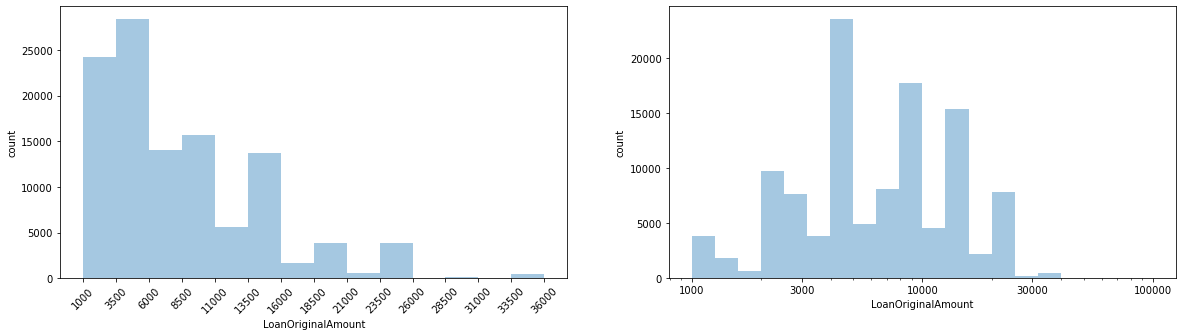

In [36]:
#LoanOriginalAmount both linear and logarimithic

plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
binedges = np.arange(1000, df_main_explore['LoanOriginalAmount'].max()+2500, 2500)
sns.distplot(df_main_explore['LoanOriginalAmount'], kde=False, bins = binedges);
plt.xticks(binedges, rotation = 45)
plt.ylabel('count');

plt.subplot(1,2,2)
binedges = 10 ** np.arange(3, 5+0.1, 0.1)
ticks = [1000, 3000, 10000, 30000, 100000]
labels = ['{}'.format(x) for x in ticks]
sns.distplot(df_main_explore['LoanOriginalAmount'], kde=False, bins = binedges);

plt.ylabel('count')
plt.xscale('log')
plt.xticks(ticks, labels);

Usually, the loan company will look at different factors like employment and assets a borrower has before letting a borrower have a certain amount of money looking at risk.  It is possible that higher amounts of money might have a lower interest rate than smaller loans.

In [37]:
#Logarimithic distribution of EmploymentStatusDuration
np.log10(df_main_explore['EmploymentStatusDuration'].describe())

C:\Users\westi\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.023010
mean     1.982545
std      1.975120
min          -inf
25%      1.414973
50%      1.826075
75%      2.136721
max      2.877947
Name: EmploymentStatusDuration, dtype: float64

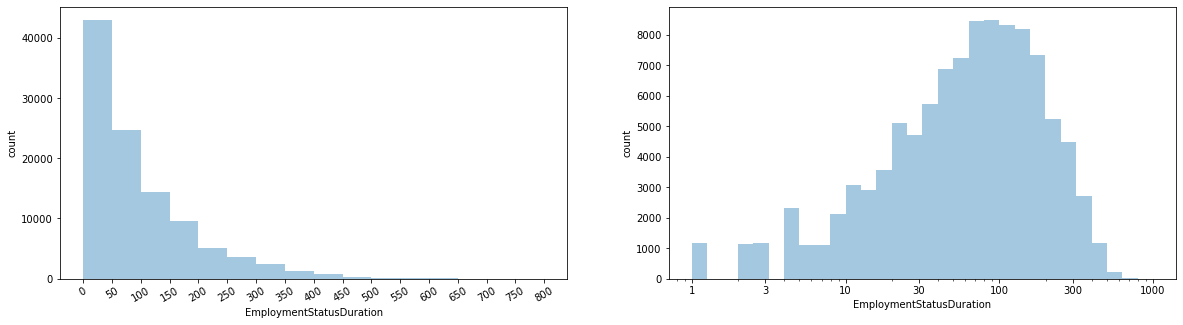

In [38]:
#EmploymentStatusDuration both linear and logarithmic plots

plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
binedges = np.arange(0, df_main_explore['EmploymentStatusDuration'].max()+50, 50)
sns.distplot(df_main_explore['EmploymentStatusDuration'], kde=False, bins = binedges);
plt.xticks(binedges, rotation = 30)
plt.ylabel('count');

plt.subplot(1,2,2)
binedges = 10 ** np.arange(0, 3+0.1, 0.1)
ticks = [1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(x) for x in ticks]
sns.distplot(df_main_explore['EmploymentStatusDuration'], kde=False, bins = binedges);
plt.ylabel('count')
plt.xscale('log')
plt.xticks(ticks, labels);


Looking at employment duration, it can be a factor in the ability at borrower can make payments.  This could be a factor in assigning a borrower a certain interest rate.

In [39]:
#Logarimithic distribution of CurrentCreditLines
np.log10(df_main_explore['CurrentCreditLines'].describe())

count    5.023096
mean     1.013135
std      0.737049
min          -inf
25%      0.845098
50%      1.000000
75%      1.113943
max      1.770852
Name: CurrentCreditLines, dtype: float64

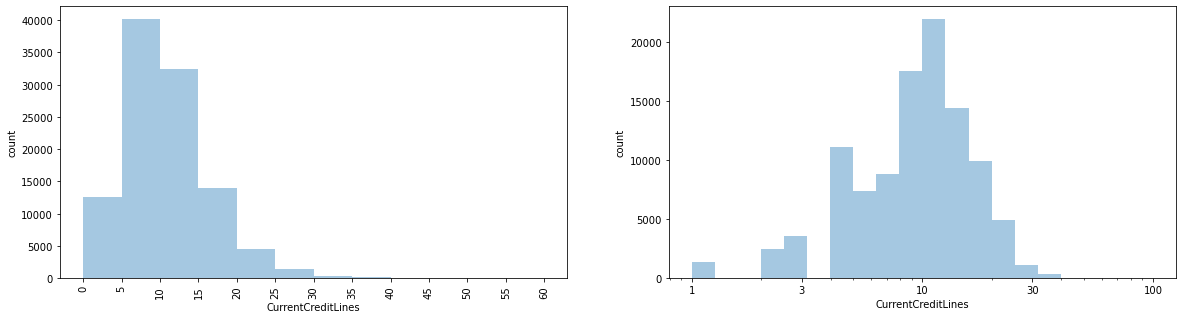

In [40]:
#CurrentCreditLines both linear and logarithmic plots

plt.figure(figsize = [20,5])

plt.subplot(1,2,1)
binedges = np.arange(0, df_main_explore['CurrentCreditLines'].max()+5, 5)
sns.distplot(df_main_explore['CurrentCreditLines'], kde=False, bins = binedges);
plt.xticks(binedges, rotation = 90)
plt.ylabel('count');

plt.subplot(1,2,2)
binedges = 10 ** np.arange(0, 2+0.1, 0.1)
ticks = [1, 3, 10, 30, 100]
labels = ['{}'.format(x) for x in ticks]
sns.distplot(df_main_explore['CurrentCreditLines'], kde=False, bins = binedges);
plt.ylabel('count')
plt.xscale('log')
plt.xticks(ticks, labels);

Having multiple lines of credit might affect interest rate depending on if the borrower is making current payments on it or not.  It does show history and would lower the assigned interest rate.

In [41]:
##Logarimithic distribution of CurrentDelinquencies
np.log10(df_main_explore['CurrentDelinquencies'].describe())

count    5.050364
mean    -0.226786
std      0.296776
min          -inf
25%          -inf
50%          -inf
75%          -inf
max      1.919078
Name: CurrentDelinquencies, dtype: float64

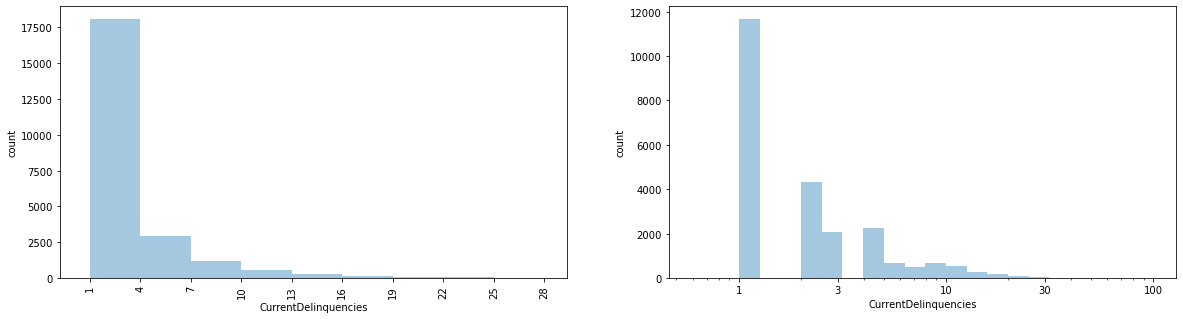

In [42]:
# CurrentDelinquencies both linear and logarithmic plots

plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
binedges = np.arange (1, 30, 3)
sns.distplot(df_main_explore['CurrentDelinquencies'], kde=False, bins = binedges);
plt.xticks(binedges, rotation = 90)
plt.ylabel('count');

plt.subplot(1,2,2)
binedges = 10 ** np.arange(0, 2+0.1, 0.1)
ticks = [1, 3, 10, 30, 100]
labels = ['{}'.format(x) for x in ticks]
sns.distplot(df_main_explore['CurrentDelinquencies'], kde=False, bins = binedges);
plt.ylabel('count')
plt.xscale('log')
plt.xticks(ticks, labels);



If there are delinquencies, a loan company might not loan a person anything.  However, if the organization decides to give a borrower a loan, they would assign a borrower a higher interest rate.  Looking at the linear and the logarithmic versions, it is unclear how exactly it would affect interest rate.

In [43]:
##Logarimithic distribution of DebtToIncomeRatio
np.log10(df_main_explore['DebtToIncomeRatio'].describe())

count    5.016770
mean    -0.557693
std     -0.255715
min          -inf
25%     -0.853872
50%     -0.657577
75%     -0.494850
max      1.000434
Name: DebtToIncomeRatio, dtype: float64

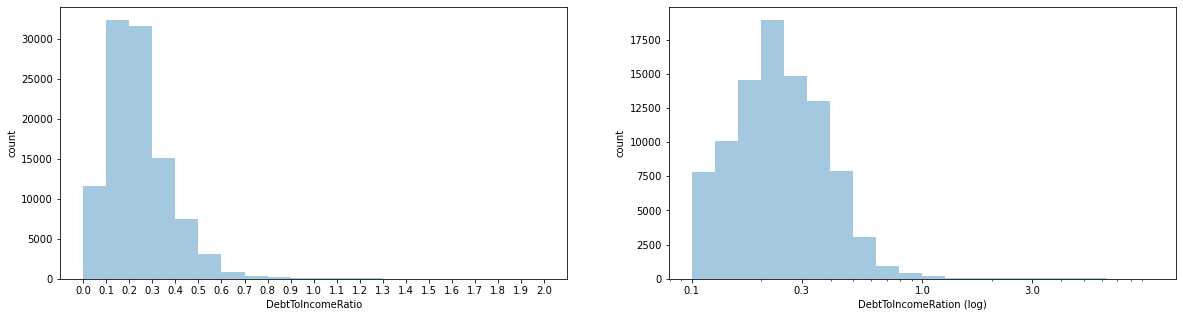

In [44]:
#DebtToIncomeRatio

plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
binedges = np.arange(0, 2+0.1, 0.1)
sns.distplot(df_main_explore['DebtToIncomeRatio'], kde=False, bins = binedges);
plt.xticks(binedges)
plt.ylabel('count');

plt.subplot(1,2,2)
binedges = 10 ** np.arange(-1, 1+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3]
labels = ['{:0.1f}'.format(x) for x in ticks]
sns.distplot(df_main_explore['DebtToIncomeRatio'], kde=False, bins = binedges);
plt.ylabel('count')
plt.xscale('log')
plt.xlabel('DebtToIncomeRation (log)')
plt.xticks(ticks, labels);

Having a low debt-to-income ratio shows less risk.  If a borrower gets a ratio of 1, it shows the gross income a borrower makes equals the amount of total debt a borrower has to pay. A high debt-to-income ratio would affect assigned interest rate.  However, both graphs are unclear how exactly it would affect interest rate.

### Discuss the distribution of your variable of interest.  Were there any unusual points?  Did you need to perform any transformations?

Looking at borrower rate, it shows most borrowers fall between 4% and 36%.  The highest interest rate is around 36% while the lowest is 0%.  I assigned a new dataframe to investigate these outliers and sorted it by interest rate. It shows only 37 borrowers that fall below 4% interest.

### Of the features you investigated, whre there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data?  If so, why did you do this?

Most of the numerical distributions were right-skewed.  In these instances, I plotted a logarithmic graph along side it to look at the distribution to see if there are any patterns that could be observed.  In the case of loan amount, employment duration, and current credit lines, one shows a bell curve distribution while the other two show spikes at certain points.  While there were a couple of variables that were still right skewed even after a logarithmic conversion, it might be more clear using bivarate analysis.

## Bivariate Exploration

<a id="bva"></a>

Now, I want to look at a scatterplot between the interest rate variable and the other numeric variables using a pair grid scatterplot.

In [45]:
#assigning numeric variable and categorical variable list to be used in bivariate analysis

numeric_variables = ['BorrowerRate','LoanCurrentDaysDelinquent',
              'LoanOriginalAmount', 'EmploymentStatusDuration', 'CurrentCreditLines', 'CurrentDelinquencies', 
               'DebtToIncomeRatio']
categorical_variables = ['LoanStatus', 'BorrowerRate', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRange',
                        'IncomeRange']

In [47]:
#using sample dataframe with 10000 random rows for scatterplot analysis, filling nulls with 0

df_sample = df_main_explore.sample(10000)
df_sample = df_sample[numeric_variables]
df_sample = df_sample.fillna(0)
df_sample = df_sample.reset_index(drop=True)

In [48]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BorrowerRate               10000 non-null  float64
 1   LoanCurrentDaysDelinquent  10000 non-null  int64  
 2   LoanOriginalAmount         10000 non-null  int64  
 3   EmploymentStatusDuration   10000 non-null  float64
 4   CurrentCreditLines         10000 non-null  float64
 5   CurrentDelinquencies       10000 non-null  float64
 6   DebtToIncomeRatio          10000 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 547.0 KB


These sets of scatterplots will observe the numeric variables in reference to interest rate using the sample dataframe

This first row will observe number of days the loan is delinquent and the original amount of the loan versus interest rate

The second row will observe employment status duration and current credit lines versus interest rate

The final row will observe current delinquencies and debt-to-income ratio versus interest rate

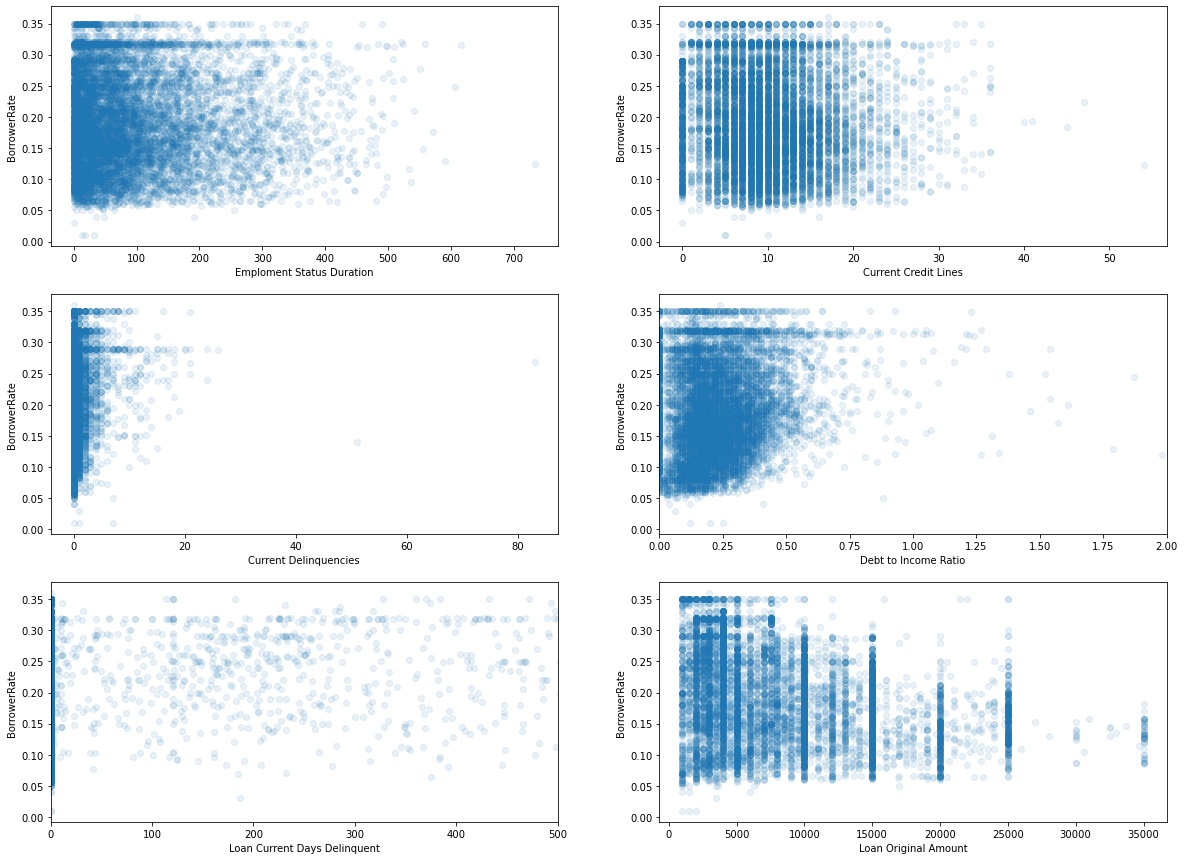

In [49]:
#plotting six different scatterplots comparing borrower rate to the different numerical variables.  Using an alpha
#of 0.1 to add transparency

plt.figure(figsize=[20,15])
plt.subplot(3,2,1)
plt.scatter(data = df_sample, x='EmploymentStatusDuration', y='BorrowerRate', alpha = 0.1)
plt.xlabel('Emploment Status Duration')
plt.ylabel('BorrowerRate')

plt.subplot(3,2,2)
plt.scatter(data = df_sample, x='CurrentCreditLines', y='BorrowerRate', alpha = 0.1)
plt.xlabel('Current Credit Lines')
plt.ylabel('BorrowerRate')

plt.subplot(3,2,3)
plt.scatter(data = df_sample, x='CurrentDelinquencies', y='BorrowerRate', alpha = 0.1)
plt.xlabel('Current Delinquencies')
plt.ylabel('BorrowerRate')

plt.subplot(3,2,4)
plt.scatter(data = df_sample, x='DebtToIncomeRatio', y='BorrowerRate', alpha = 0.1)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('BorrowerRate')
plt.xlim((0,2))

plt.subplot(3,2,5)
plt.scatter(data = df_sample, x='LoanCurrentDaysDelinquent', y='BorrowerRate', alpha = 0.1)
plt.xlabel('Loan Current Days Delinquent')
plt.ylabel('BorrowerRate')
plt.xlim((0,500))

plt.subplot(3,2,6)
plt.scatter(data = df_sample, x='LoanOriginalAmount', y='BorrowerRate', alpha = 0.1)
plt.xlabel('Loan Original Amount')
plt.ylabel('BorrowerRate');


Three of these six scatterplots reveal a correlation.  A positive correlation in exists in current delinquencies (interest rate increases the more delinquencies the borrower has).  Also, a positive correlation with borrowers receiving a higher interest rate is present examining Debt-to-Income ratio.  Finally, a negative correlation is present in the original loan amount.  The higher the amount is borrowed, it might result in a lower interest rate for the borrower.

These next sets will observe the relationship between other numerical variables to see if a correlation exists

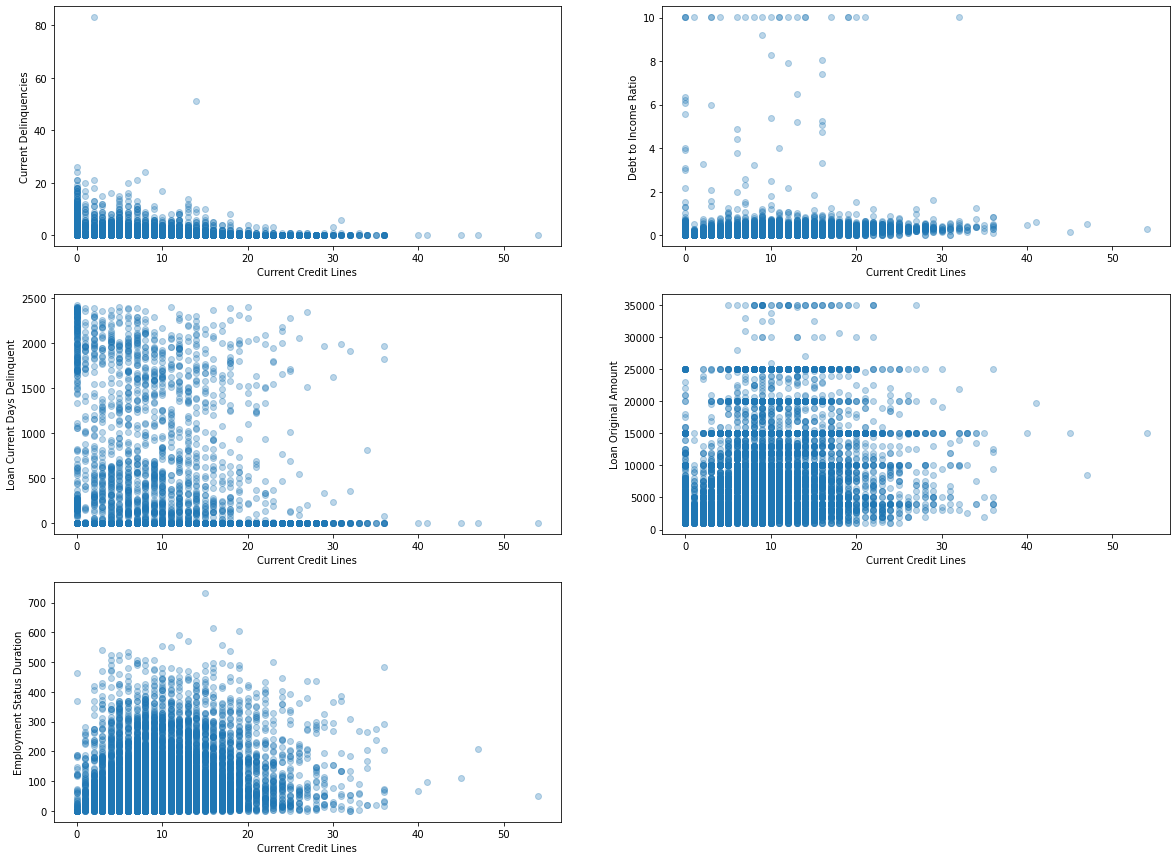

In [50]:
#Comparing CurrentCreditLines

plt.figure(figsize=[20,15])

plt.subplot(3,2,1)
plt.scatter(data = df_sample, x='CurrentCreditLines', y='CurrentDelinquencies', alpha = 0.3)
plt.xlabel('Current Credit Lines')
plt.ylabel('Current Delinquencies')

plt.subplot(3,2,2)
plt.scatter(data = df_sample, x='CurrentCreditLines', y='DebtToIncomeRatio', alpha = 0.3)
plt.xlabel('Current Credit Lines')
plt.ylabel('Debt to Income Ratio')

plt.subplot(3,2,3)
plt.scatter(data = df_sample, x='CurrentCreditLines', y='LoanCurrentDaysDelinquent', alpha = 0.3)
plt.xlabel('Current Credit Lines')
plt.ylabel('Loan Current Days Delinquent')

plt.subplot(3,2,4)
plt.scatter(data = df_sample, x='CurrentCreditLines', y='LoanOriginalAmount', alpha = 0.3)
plt.xlabel('Current Credit Lines')
plt.ylabel('Loan Original Amount')

plt.subplot(3,2,5)
plt.scatter(data = df_sample, x='CurrentCreditLines', y='EmploymentStatusDuration', alpha = 0.3)
plt.xlabel('Current Credit Lines')
plt.ylabel('Employment Status Duration');

Current Credit Lines vs Current Delinquencies has a negative correlation. The rest of the graphs do not really show a correlation.  I'll probably carry this further with multivarate analysis.

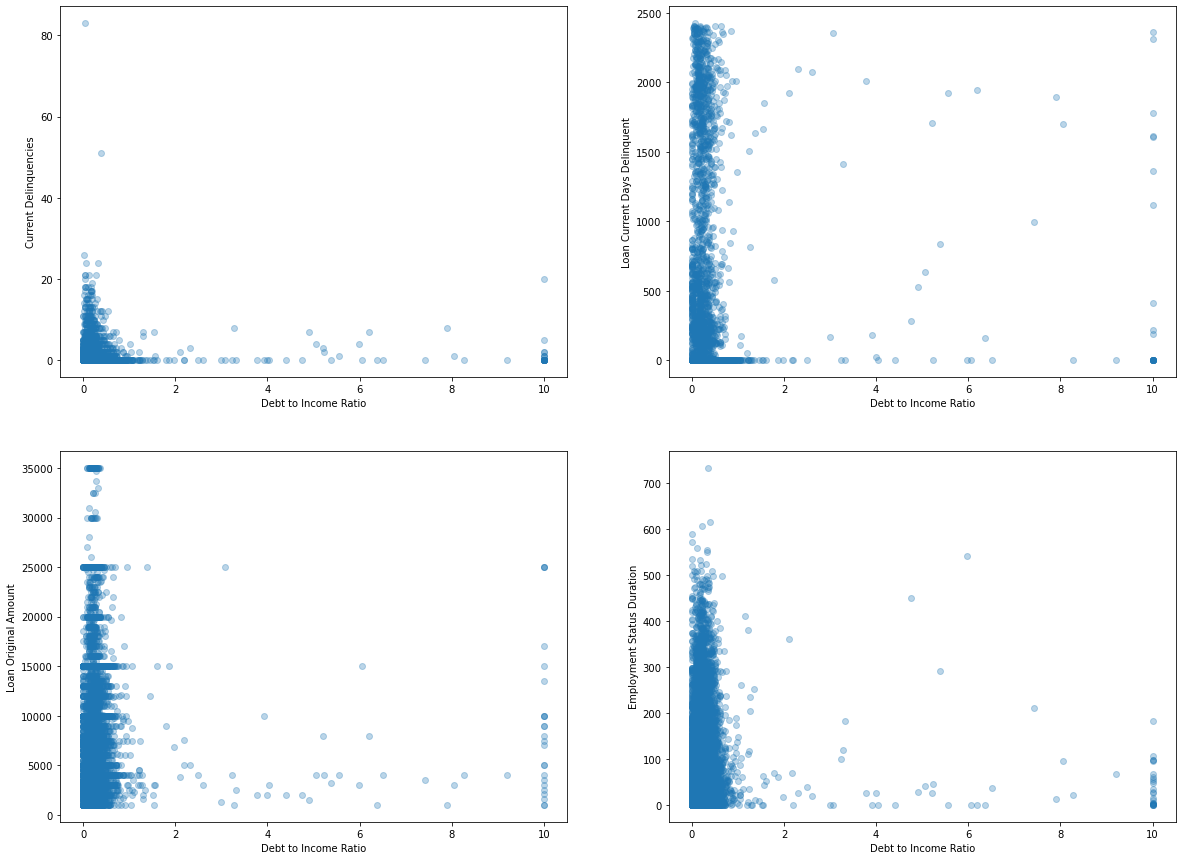

In [51]:
#plotting DebtToIncomeRatio


plt.figure(figsize=[20,15])

plt.subplot(2,2,1)
plt.scatter(data = df_sample, x='DebtToIncomeRatio', y='CurrentDelinquencies', alpha = 0.3)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Current Delinquencies')

plt.subplot(2,2,2)
plt.scatter(data = df_sample, x='DebtToIncomeRatio', y='LoanCurrentDaysDelinquent', alpha = 0.3)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Loan Current Days Delinquent')

plt.subplot(2,2,3)
plt.scatter(data = df_sample, x='DebtToIncomeRatio', y='LoanOriginalAmount', alpha = 0.3)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Loan Original Amount')

plt.subplot(2,2,4)
plt.scatter(data = df_sample, x='DebtToIncomeRatio', y='EmploymentStatusDuration', alpha = 0.3)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Employment Status Duration');



Three of the four graphs look similar.  The only exception would possibly be debt-to-income ration compared to current delinquencies might have some kind of correlation.  Either way, I'll won't go further with these comparisons.

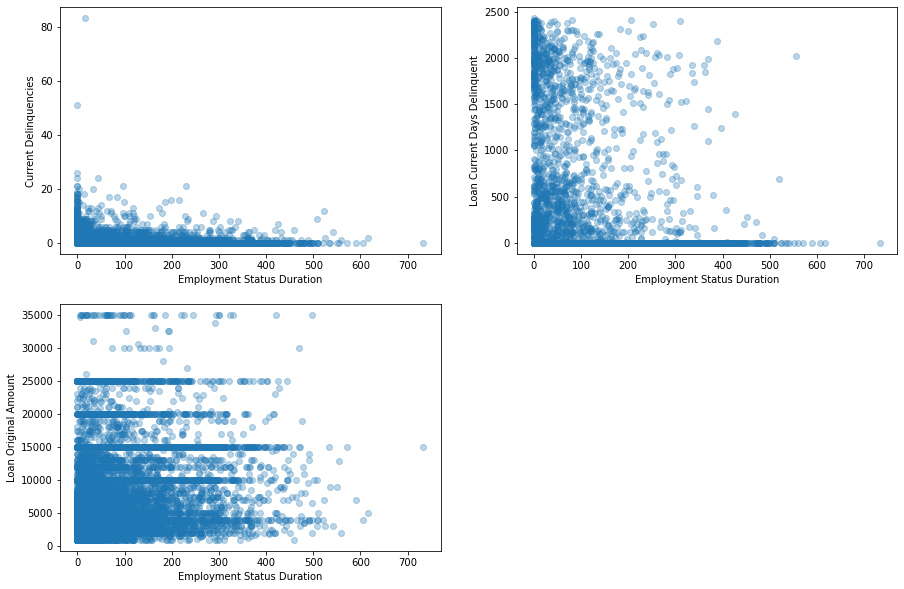

In [59]:
#Looking at Employment status duration

plt.figure(figsize=[15,10])

plt.subplot(2,2,1)
plt.scatter(data = df_sample, x='EmploymentStatusDuration', y='CurrentDelinquencies', alpha = 0.3)
plt.xlabel('Employment Status Duration')
plt.ylabel('Current Delinquencies')

plt.subplot(2,2,2)
plt.scatter(data = df_sample, x='EmploymentStatusDuration', y='LoanCurrentDaysDelinquent', alpha = 0.3)
plt.xlabel('Employment Status Duration')
plt.ylabel('Loan Current Days Delinquent')

plt.subplot(2,2,3)
plt.scatter(data = df_sample, x='EmploymentStatusDuration', y='LoanOriginalAmount', alpha = 0.3)
plt.xlabel('Employment Status Duration')
plt.ylabel('Loan Original Amount');

Between these three graphs, it shows a slight negative correlation between current delinquencies and employment status duration.  The other two don't really show a correlation.  I'll will carry current delinquencies vs employment status duration in multivarate analysis.

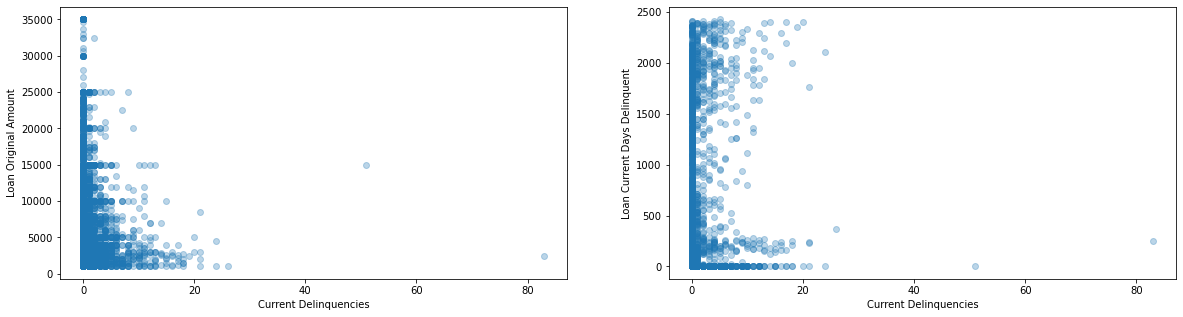

In [56]:
#Current Delinquencies

plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
plt.scatter(data = df_sample, x='CurrentDelinquencies', y='LoanOriginalAmount', alpha = 0.3)
plt.xlabel('Current Delinquencies')
plt.ylabel('Loan Original Amount')

plt.subplot(1,2,2)
plt.scatter(data = df_sample, x='CurrentDelinquencies', y='LoanCurrentDaysDelinquent', alpha = 0.3)
plt.xlabel('Current Delinquencies')
plt.ylabel('Loan Current Days Delinquent');


Out of these two, there is a correlation between current delinquencies and the original amount of the loan.  I'll explore this relationship further in multivarate analysis.

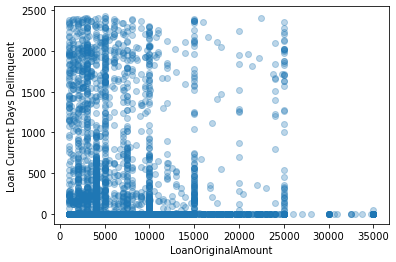

In [53]:
#Loan Original Amount vs Loan Current Days Delinquent

plt.scatter(data = df_sample, x='LoanOriginalAmount', y='LoanCurrentDaysDelinquent', alpha = 0.3)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Loan Current Days Delinquent');

No correlation is present comparing the original amount of the loan and how delinquent the current loan is.  This comparison probably won't be explored further.

The next set of plots will look at the different categorical variables and how they compare with the interest rate. Another dataframe will be created using only the categorical variable columns.

In [86]:
#creating the second sample dataframe using only the categorical variable columns

df_sample2 = df_main_explore[categorical_variables]

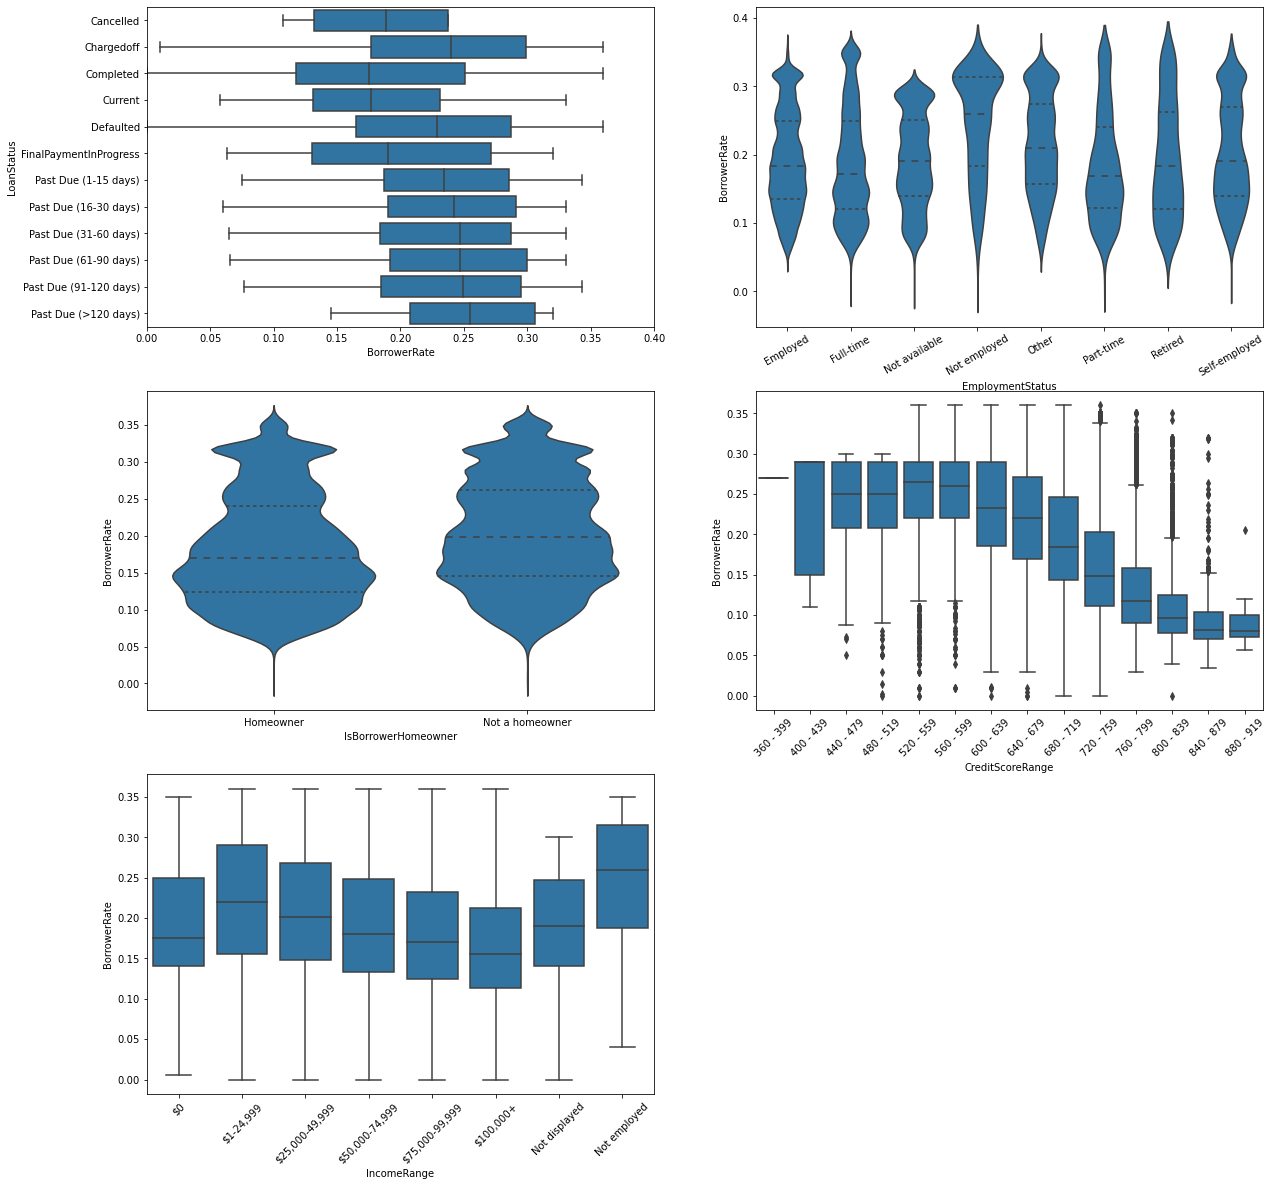

In [89]:
#setting up box and violin plots for each categorical variable

plt.figure(figsize=[20,20])

plt.subplot(3,2,1)
sns.boxplot(data=df_sample2, y='LoanStatus', x='BorrowerRate', color=base_color)
#plt.xticks(rotation=90)
plt.xlim((0,0.4))

plt.subplot(3,2,2)
sns.violinplot(data=df_sample2, x='EmploymentStatus', y='BorrowerRate', color=base_color, inner='quartile')
plt.xticks(rotation=30);

plt.subplot(3,2,3)
sns.violinplot(data=df_sample2, x='IsBorrowerHomeowner', y='BorrowerRate', color=base_color, inner='quartile')
#plt.xticks(rotation=30);

plt.subplot(3,2,4)
sns.boxplot(data=df_sample2, x='CreditScoreRange', y='BorrowerRate', color=base_color)
plt.xticks(rotation=45)

plt.subplot(3,2,5)
sns.boxplot(data=df_sample2, x='IncomeRange', y='BorrowerRate', order=order2, color=base_color)
plt.xticks(rotation=45);

Each of the categorical variables show a definite relationship with interest rate.  The borrower rate is typically higher with a negative status.  The violin plot illustrating employment or other kind income show a borrower having a lower interest rate.  If a borrower is a homeowner, they typically have a lower interest rate with a wider bottom and narrower top on the homeowner side of the violin plot.  The box plot showing credit scores definitely show that a borrower would have a lower interest rate the higher the score the borrower has.  Finally, having a higher income correlates a borrower having a lower interest rate.  Overall, the strongest relationship is definitely credit score.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The strongest relationship, as suspected is credit score vs interest rate.  The other categorical variables also show some correlation between interest rate.  When comparing interest rate and other numerical variables, only two numerical variables having a slight positive correlation are comparing interest rate with current delinquencies and debt-to-income ratio.  There is a negative correlation comparing the original amount of the loan compared with interest rate.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I looked at comparing the other numerical variable with each other that didn't have a direct correlation with interest rate.  All of the following have a negative correlation when compared with current delinquencies: current delinquencies vs loan original amount, current delinquencies vs employment status duration, current delinquencies vs debt-to-income ratio, and current delinquencies vs credit lines.  Current delinquencies, interest rate, and one of the other four will be compared in multivarate analysis to see if a relationship exists.  Comparing the remaining variables with each other did not show any correlation.


## Multivariate Exploration

<a id="mva"></a>

To start with I want to compare interest rate, current delinquencies and a third numerical variable to see if a relationship exists.

In [97]:
df_main_explore.describe()

BorrowerRate  LoanCurrentDaysDelinquent  LoanOriginalAmount  \
count  112342.000000              112342.000000       112342.000000   
mean        0.193042                 152.992683         8339.122581   
std         0.074842                 466.141969         6241.253429   
min         0.000000                   0.000000         1000.000000   
25%         0.134600                   0.000000         4000.000000   
50%         0.184000                   0.000000         6500.000000   
75%         0.250600                   0.000000        12000.000000   
max         0.360000                2704.000000        35000.000000   

       EmploymentStatusDuration  CurrentCreditLines  CurrentDelinquencies  \
count             105441.000000       105462.000000         112296.000000   
mean                  96.060584           10.307058              0.593218   
std                   94.432241            5.458196              1.980506   
min                    0.000000            0.000000              0.000000   
25%                   26.000000            7.000000              0.000000   
50%                   67.000000           10.000000              0.000000   
75%                  137.000000           13.000000              0.000000   
max                  755.000000           59.000000             83.000000   

       DebtToIncomeRatio  
count      103937.000000  
mean            0.276890  
std             0.554989  
min             0.000000  
25%             0.140000  
50%             0.220000  
75%             0.320000  
max            10.010000

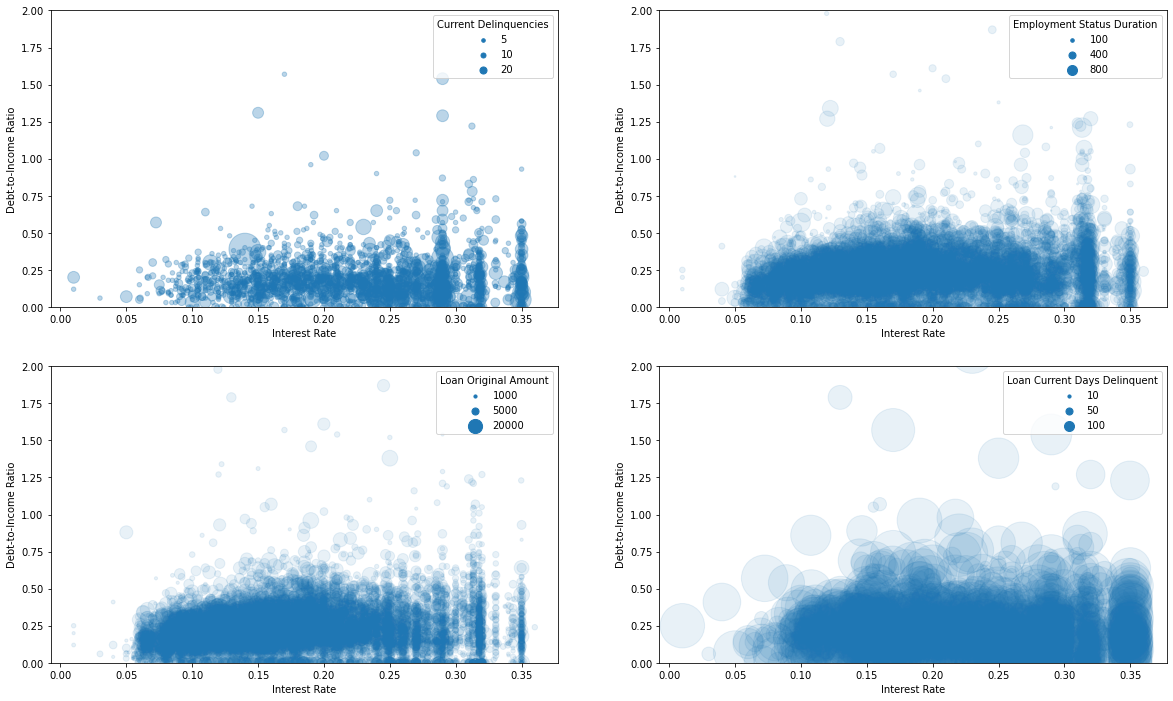

In [117]:
#This will use the df_sampe dataframe to compare three different numerical variables with each other.
plt.figure(figsize=[20,12])

#loop for setting up size for legend; loop from lesson 5 of data visualization module:multivariate analysis
size1 = [5,10,20]
size2 = [100,400,800]
size3 = [1000, 5000, 20000]
size4 = [10, 50, 100]
df_sample['CurrentDelinquenciesSize'] = df_sample['CurrentDelinquencies'] * 20
df_sample['LoanOriginalSize'] = df_sample['LoanOriginalAmount'] / 100
legend_obj1 = []
legend_obj2 = []
legend_obj3 = []
legend_obj4 = []
for s1, s2, s3, s4 in zip(size1, size2, size3, size4):
    legend_obj1.append(plt.scatter([], [], s = s1*10, color = base_color))
    legend_obj2.append(plt.scatter([], [], s = s2/2, color = base_color))
    legend_obj3.append(plt.scatter([], [], s = s3/100, color = base_color))
    legend_obj4.append(plt.scatter([], [], s = s4, color = base_color))


plt.subplot(2,2,1)
plt.scatter(data = df_sample, x = 'BorrowerRate', y = 'DebtToIncomeRatio', s = 'CurrentDelinquenciesSize', alpha = 0.3)
plt.legend(legend_obj1, size1, title='Current Delinquencies', markerscale=0.5)
plt.xlabel('Interest Rate')
plt.ylabel('Debt-to-Income Ratio')
plt.ylim((0,2))

plt.subplot(2,2,2)
plt.scatter(data = df_sample, x = 'BorrowerRate', y = 'DebtToIncomeRatio', s = 'EmploymentStatusDuration', alpha = 0.1)
plt.legend(legend_obj2, size2, title='Employment Status Duration', markerscale=0.5);
plt.xlabel('Interest Rate')
plt.ylabel('Debt-to-Income Ratio')
plt.ylim((0,2))

plt.subplot(2,2,3)
plt.scatter(data = df_sample, x = 'BorrowerRate', y = 'DebtToIncomeRatio', s = 'LoanOriginalSize', alpha = 0.1)
plt.legend(legend_obj3, size3, title='Loan Original Amount');
plt.xlabel('Interest Rate')
plt.ylabel('Debt-to-Income Ratio')
plt.ylim((0,2))

plt.subplot(2,2,4)
plt.scatter(data = df_sample, x = 'BorrowerRate', y = 'DebtToIncomeRatio', s = 'LoanCurrentDaysDelinquent', alpha = 0.1)
plt.legend(legend_obj4, size4, title='Loan Current Days Delinquent');
plt.xlabel('Interest Rate')
plt.ylabel('Debt-to-Income Ratio')
plt.ylim((0,2));

This shows the relationship between debt-to-income ratio and interest rate.  These four scatterplots adding in the third numeric variable, loan original amount, in my opinion, doesn't really add substance and none of these will be used.  I'll look at another numeric relationship pair that was established in bivariate analysis.  These next sets will look at interest rate vs loan original amount adding in the other four numerical variables.

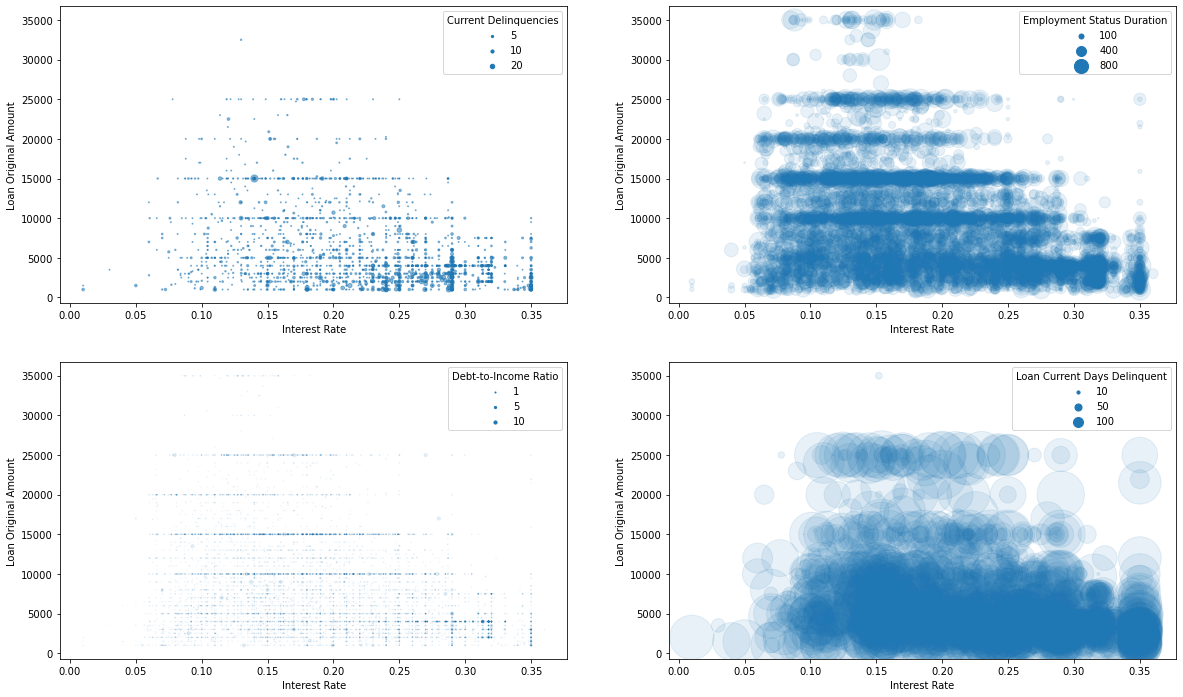

In [124]:
#This will use the df_sample dataframe to compare three different numerical variables with each other.
plt.figure(figsize=[20,12])

#loop for setting up size for legend for four different sizes
#loop from lesson 5 of data visualization module:multivariate analysis

size1 = [5,10,20]
size2 = [100,400,800]
size3 = [1,5,10]
size4 = [10, 50, 100]
legend_obj1 = []
legend_obj2 = []
legend_obj3 = []
legend_obj4 = []
for s1, s2, s3, s4 in zip(size1, size2, size3, size4):
    legend_obj1.append(plt.scatter([], [], s = s1, color = base_color))
    legend_obj2.append(plt.scatter([], [], s = s2, color = base_color))
    legend_obj3.append(plt.scatter([], [], s = s3, color = base_color))
    legend_obj4.append(plt.scatter([], [], s = s4, color = base_color))


plt.subplot(2,2,1)
plt.scatter(data = df_sample, x = 'BorrowerRate', y = 'LoanOriginalAmount', s = 'CurrentDelinquencies', alpha = 0.5)
plt.legend(legend_obj1, size1, title='Current Delinquencies')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Original Amount')

plt.subplot(2,2,2)
plt.scatter(data = df_sample, x = 'BorrowerRate', y = 'LoanOriginalAmount', s = 'EmploymentStatusDuration', alpha = 0.1)
plt.legend(legend_obj2, size2, title='Employment Status Duration', markerscale=0.5);
plt.xlabel('Interest Rate')
plt.ylabel('Loan Original Amount')

plt.subplot(2,2,3)
plt.scatter(data = df_sample, x = 'BorrowerRate', y = 'LoanOriginalAmount', s = 'DebtToIncomeRatio', alpha = 0.1)
plt.legend(legend_obj3, size3, title='Debt-to-Income Ratio');
plt.xlabel('Interest Rate')
plt.ylabel('Loan Original Amount')

plt.subplot(2,2,4)
plt.scatter(data = df_sample, x = 'BorrowerRate', y = 'LoanOriginalAmount', s = 'LoanCurrentDaysDelinquent', alpha = 0.1)
plt.legend(legend_obj4, size4, title='Loan Current Days Delinquent');
plt.xlabel('Interest Rate')
plt.ylabel('Loan Original Amount');

Again, the relationship doesn't emphasize much.  There might be a small exception looking at adding current delinquencies.  There is a small concentration of values between 25-30% with a loan amount around $5000. These won't be used.  Now I want to look at the two numerical variables vs a categorical variable

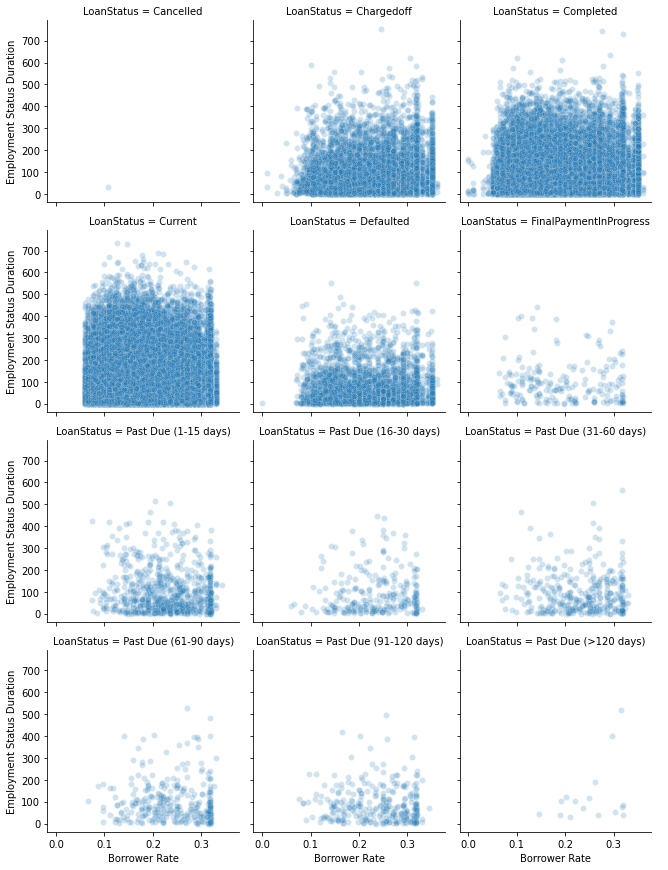

In [125]:
g = sns.FacetGrid(data = df_main_explore, col="LoanStatus", col_wrap = 3)
g.map_dataframe(sns.scatterplot, x="BorrowerRate", y="EmploymentStatusDuration", alpha = 0.2)
g.set_axis_labels("Borrower Rate", "Employment Status Duration");
g.add_legend();


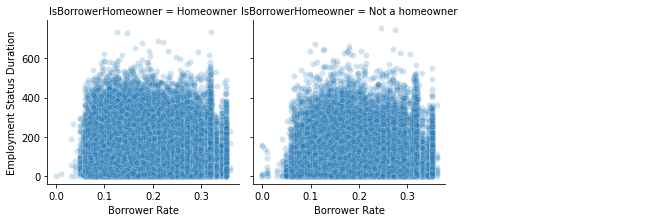

In [126]:
g = sns.FacetGrid(data = df_main_explore, col="IsBorrowerHomeowner", col_wrap = 3)
g.map_dataframe(sns.scatterplot, x="BorrowerRate", y="EmploymentStatusDuration", alpha = 0.2)
g.set_axis_labels("Borrower Rate", "Employment Status Duration");
g.add_legend();

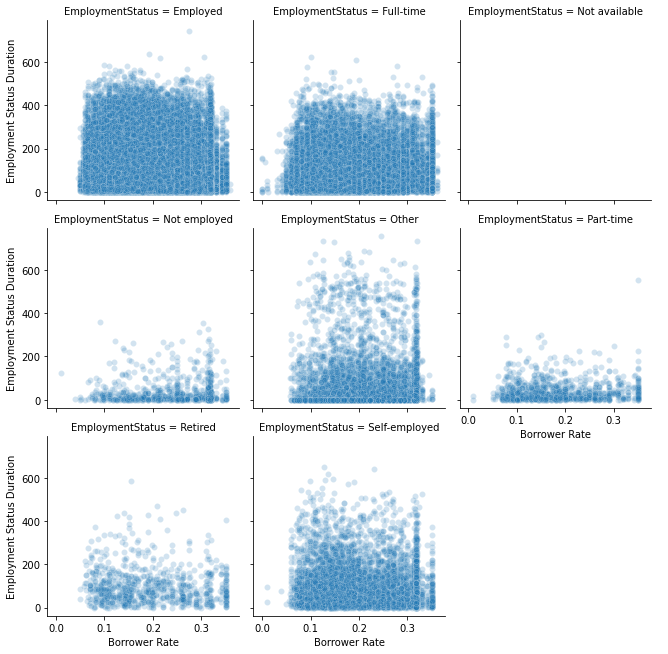

In [127]:
g = sns.FacetGrid(data = df_main_explore, col="EmploymentStatus", col_wrap = 3)
g.map_dataframe(sns.scatterplot, x="BorrowerRate", y="EmploymentStatusDuration", alpha = 0.2)
g.set_axis_labels("Borrower Rate", "Employment Status Duration");
g.add_legend();

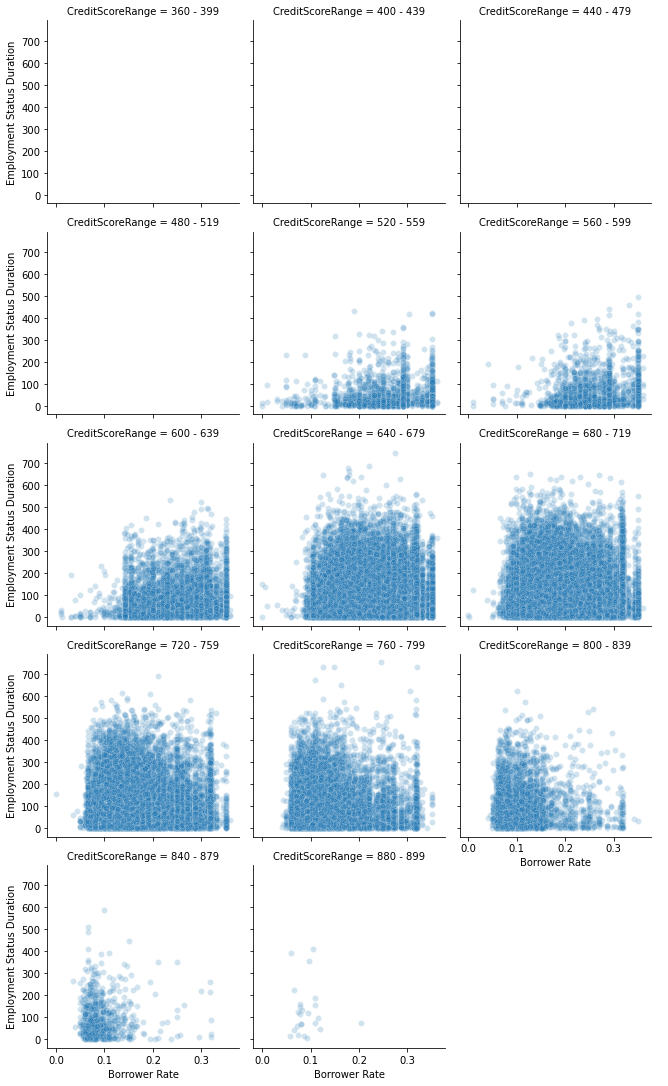

In [128]:
g = sns.FacetGrid(data = df_main_explore, col="CreditScoreRange", col_wrap = 3)
g.map_dataframe(sns.scatterplot, x="BorrowerRate", y="EmploymentStatusDuration", alpha = 0.2)
g.set_axis_labels("Borrower Rate", "Employment Status Duration");
g.add_legend();

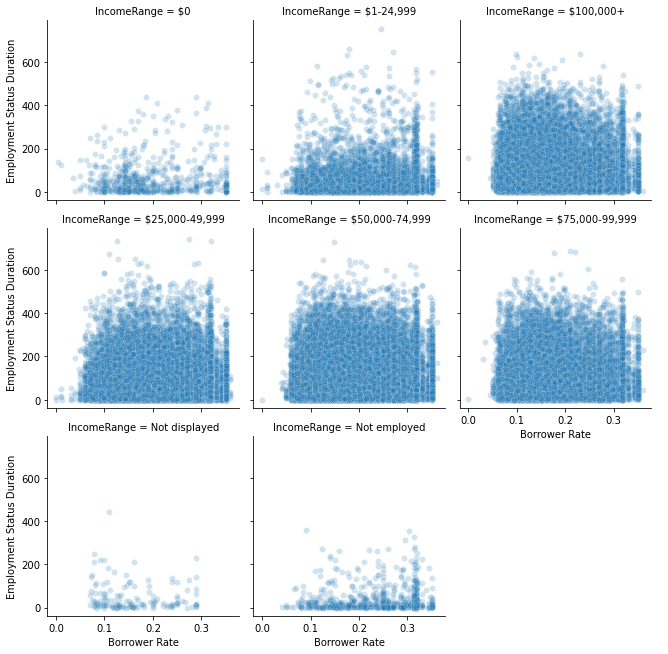

In [132]:
g = sns.FacetGrid(data = df_main_explore, col="IncomeRange", col_wrap = 3)
g.map_dataframe(sns.scatterplot, x="BorrowerRate", y="EmploymentStatusDuration", alpha = 0.2)
g.set_axis_labels("Borrower Rate", "Employment Status Duration");
g.add_legend();

While most of these relationships are unclear, one suprising thing is looking at credit score in the range of 520-640.  A relationship exists where a higher interest rate correlates with longer employment duration.  For the most part, I'll exclude these despite that one relationship that was found.

The final thing I want to explore is credit score, interest rate, and the other four categorical variables

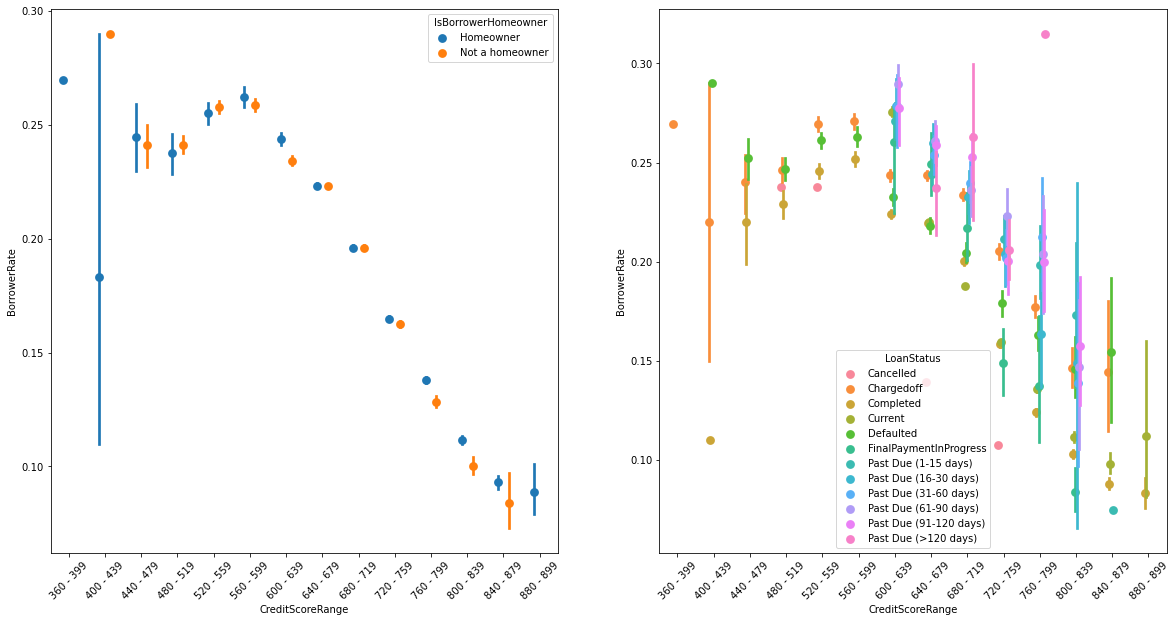

In [140]:
plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
sns.pointplot(data = df_main_explore, x = 'CreditScoreRange', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                  dodge = 0.3, linestyles = "");
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sns.pointplot(data = df_main_explore, x = 'CreditScoreRange', y = 'BorrowerRate', hue = 'LoanStatus',
                  dodge = 0.3, linestyles = "");
plt.xticks(rotation=45);

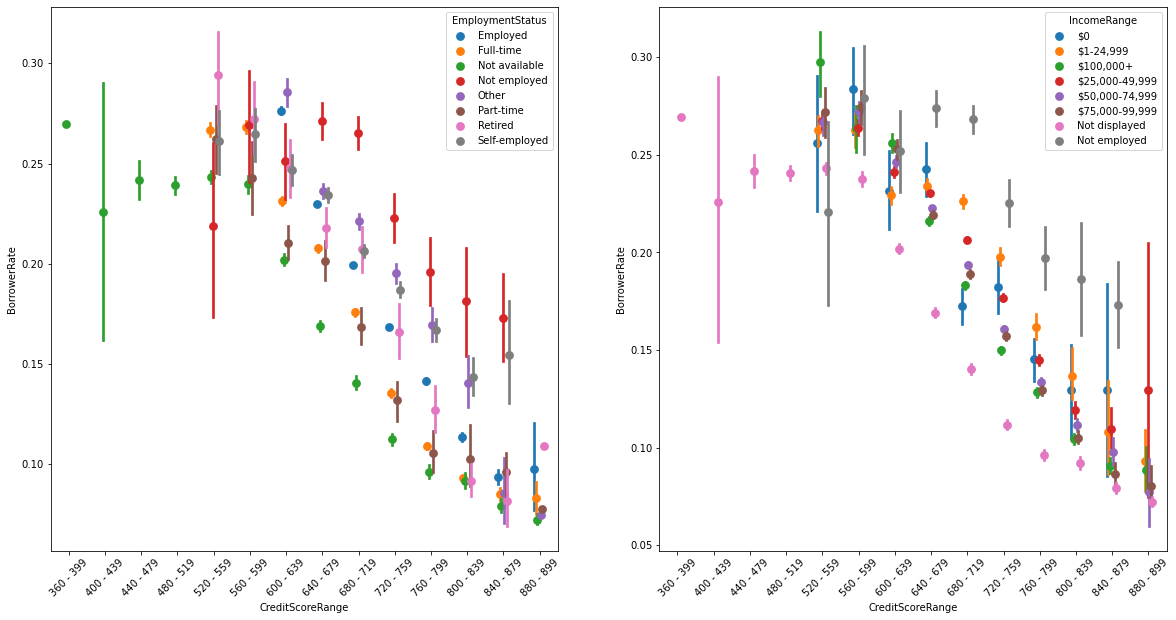

In [142]:
plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
sns.pointplot(data = df_main_explore, x = 'CreditScoreRange', y = 'BorrowerRate', hue = 'EmploymentStatus',
                  dodge = 0.3, linestyles = "");
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sns.pointplot(data = df_main_explore, x = 'CreditScoreRange', y = 'BorrowerRate', hue = 'IncomeRange',
                  dodge = 0.3, linestyles = "");
plt.xticks(rotation=45);

Looking at these pointplots, it looks like a mess with the exception of interest rate vs credit scores looking at homeownership.  I'll do barplots on these to see if the relationships are clearer.

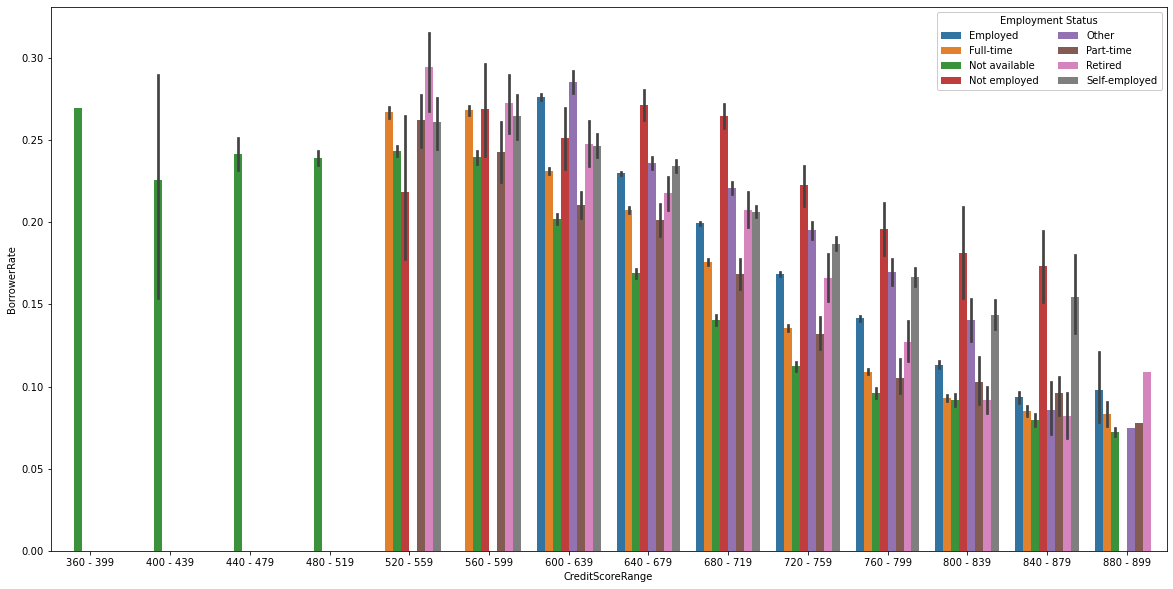

In [149]:
#EmploymentStatus (BorrowerRate vs CreditScore)

plt.figure(figsize=[20,10])
sns.barplot(data = df_main_explore, x = 'CreditScoreRange', y = 'BorrowerRate', hue = 'EmploymentStatus')
plt.legend(loc = 1, ncol = 2, framealpha = 1, title = 'Employment Status');

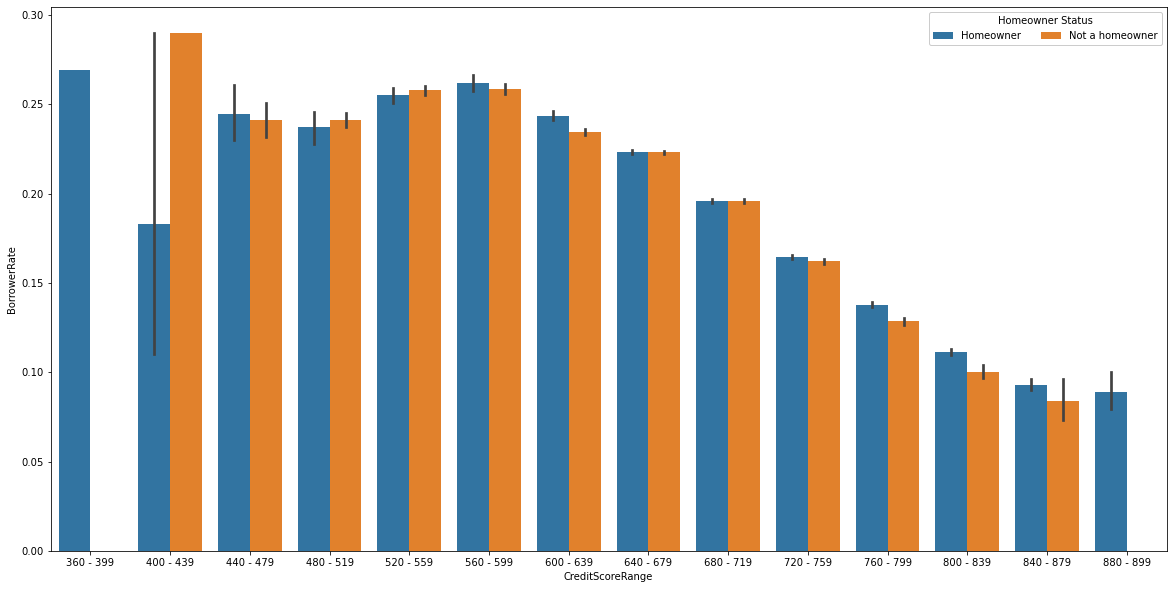

In [222]:
#IsBorrowerHomeowner (BorrowerRate vs CreditScore)

plt.figure(figsize=[20,10])
sns.barplot(data = df_main_explore, x = 'CreditScoreRange', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner')
plt.legend(loc = 1, ncol = 2, framealpha = 1, title = 'Homeowner Status');

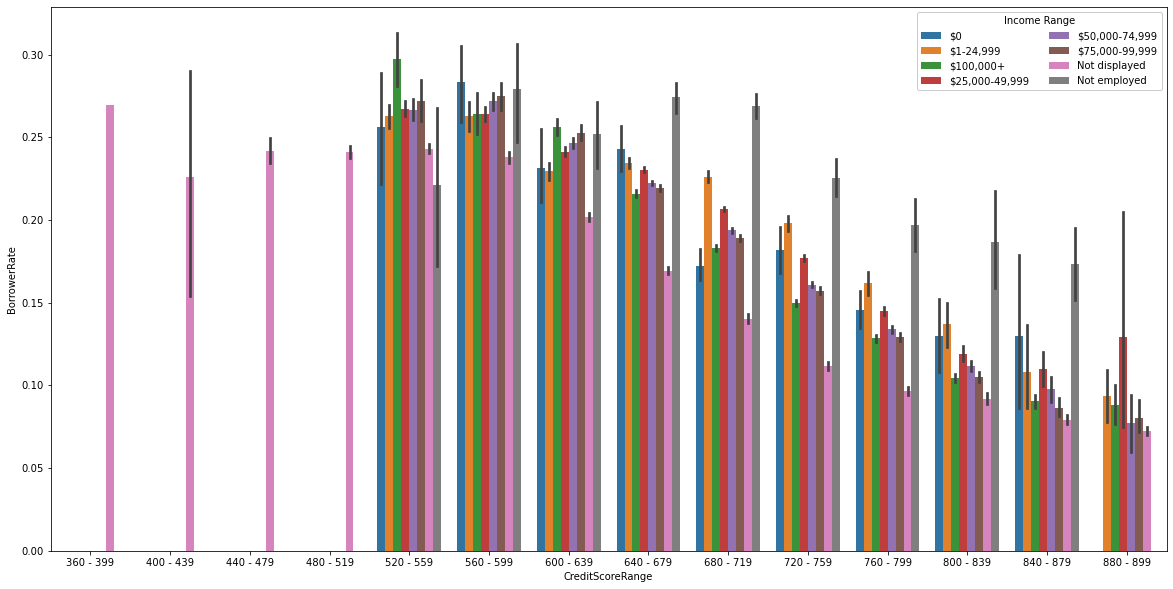

In [150]:
#IncomeRange (BorrowerRate vs CreditScore)

plt.figure(figsize=[20,10])
sns.barplot(data = df_main_explore, x = 'CreditScoreRange', y = 'BorrowerRate', hue = 'IncomeRange')
plt.legend(loc = 1, ncol = 2, framealpha = 1, title = 'Income Range');

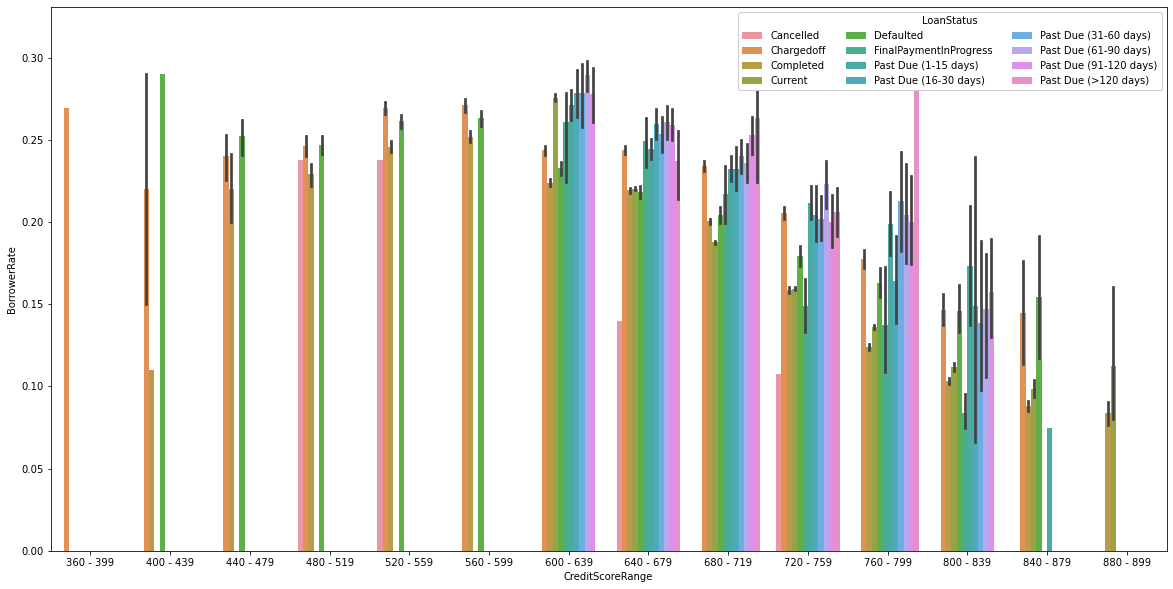

In [154]:
#Loanstatus (BorrowerRate vs CreditScore)

plt.figure(figsize=[20,10])
sns.barplot(data = df_main_explore, x = 'CreditScoreRange', y = 'BorrowerRate', hue = 'LoanStatus')
plt.legend(loc = 1, ncol = 3, framealpha = 1, title = 'LoanStatus');

With the exception of the illustrating borrower rate vs credit score range emphasizing if the borrower is a homeowner, comparing the other categories shows some confusion and ambiguity.  To simplify some of these bar graphs, I'll combine or get rid of some columns.

In [214]:
#Copying main_explore dataframe and creating three alternate columns populating them with a starter value

df_graph1 = df_main_explore.copy()
df_graph1['EmploymentStatusAlt'] = 'Employed'
df_graph1['LoanStatusAlt'] = 'Current'
df_graph1['IncomeRangeAlt'] = '$0'

In [215]:
df_graph1.IncomeRange.value_counts()

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
$1-24,999          7241
Not displayed      7017
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [220]:
#Loop iterating through each row and replacing a value in the alternate column to simplify the bar graphs

for x in range(df_graph1.shape[0]):
    
    #Employment Status
    value1 = df_graph1['EmploymentStatus'][x]
    if (value1 == "Not available") | (value1 == "Other"):
        value1 = "Not available"
    if (value1 == "Full-time") | (value1 == "Part-time") | (value1 == "Self-employed"):
        value1 = 'Employed'
    df_graph1['EmploymentStatusAlt'][x] = value
    
    #Loan Status
    value2 = df_graph1['LoanStatus'][x]
    if (value2 == 'Cancelled') | (value2 =='Chargedoff') | (value2=='Defaulted'):
        value2 = 'Cancelled, Chargedoff, or Defaulted'
    if (value2 == 'Past Due (1-15 days)') | (value2 == 'Past Due (16-30 days)') | (value2 == 'Past Due (31-60 days)'):
        value2 = 'Past Due (under 2 months)'
    if (value2 == 'Past Due (61-90 days)') | (value2 == 'Past Due (91-120 days)') | (value2 == 'Past Due (>120 days)'):
        value2 = 'Past Due (over 2 months)'
    if value2 == 'FinalPaymentInProgress':
        value2 = 'Current'
    df_graph1['LoanStatusAlt'][x] = value2
    
    #Income Range
    value3 = df_graph1['IncomeRange'][x]
    if value3 == 'Not displayed':
        value3 = 'Not available'
    if (value3 == '$0') | (value3 == 'Not employed'):
        value3 = 'Not employed'
    if (value3 == '$1-24,999') | (value3 == '$25,000-49,999'):
        value3 = '$1-49,999'
    if (value3 == '$50,000-74,999') | (value3 == '$75,000-99,999') | (value3 == '$100,000+'):
        value3 = '$50,000+'
    df_graph1['IncomeRangeAlt'][x] = value3

<ipython-input-220-6c2891365953>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graph1['EmploymentStatusAlt'][x] = value
<ipython-input-220-6c2891365953>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graph1['LoanStatusAlt'][x] = value2
<ipython-input-220-6c2891365953>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graph1['IncomeRangeAlt'][x] = value3


In [217]:
df_graph1.IncomeRangeAlt.value_counts()

$50,000+         64717
$1-$49,999       39181
Not available     7017
Not employed      1427
Name: IncomeRangeAlt, dtype: int64

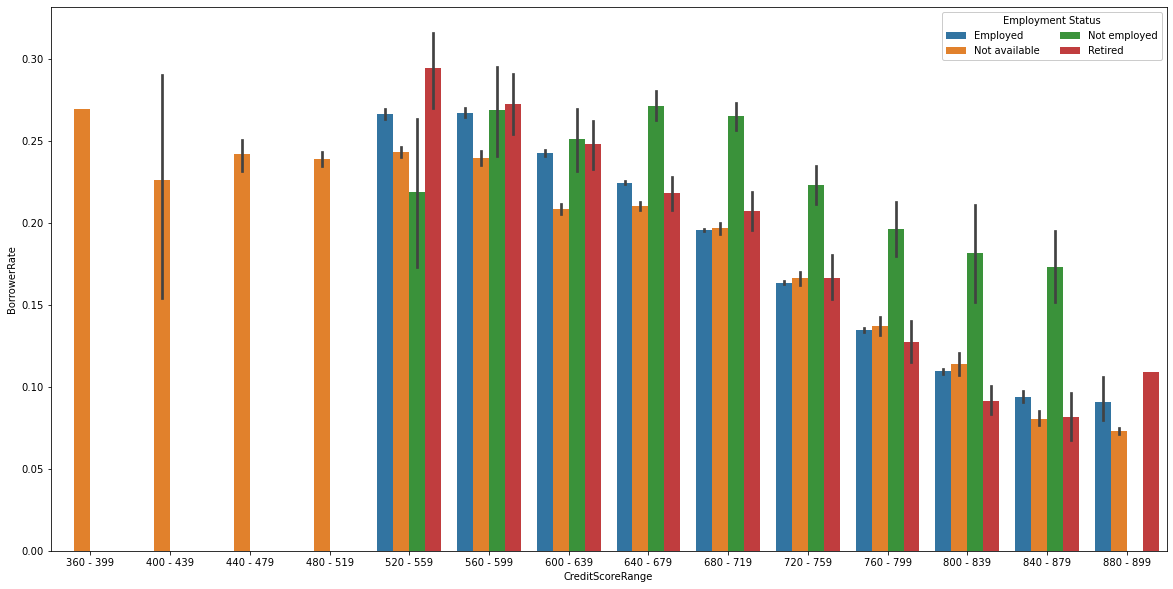

In [197]:
plt.figure(figsize=[20,10])
sns.barplot(data = df_graph1, x = 'CreditScoreRange', y = 'BorrowerRate', hue = 'EmploymentStatusAlt')
plt.legend(loc = 1, framealpha = 1, title = 'Employment Status');

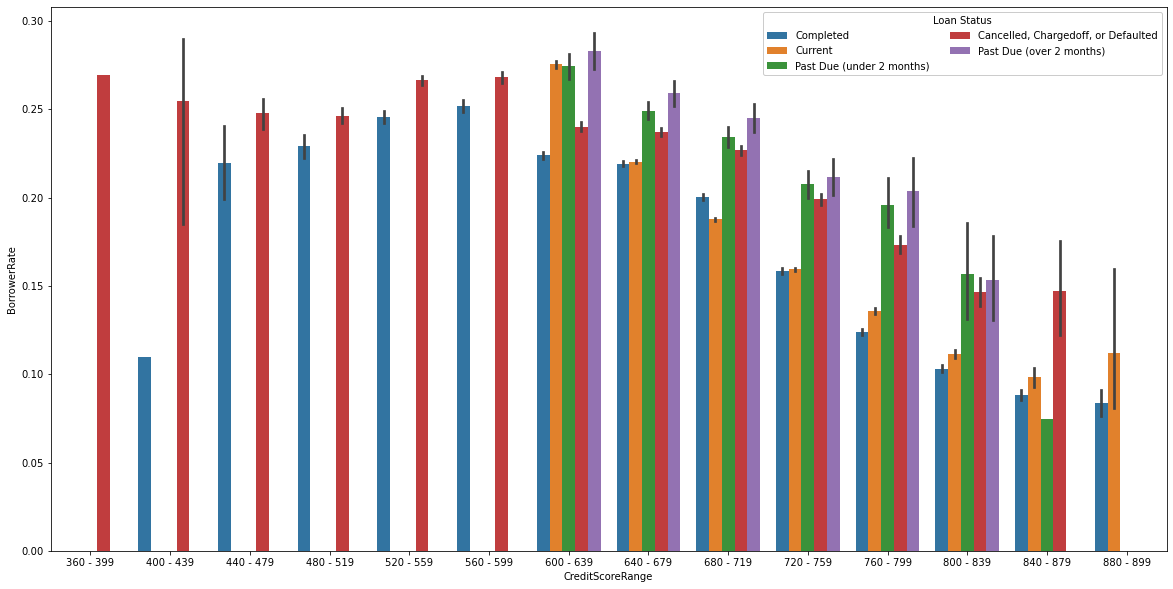

In [212]:
plt.figure(figsize=[20,10])
sns.barplot(data = df_graph1, x = 'CreditScoreRange', y = 'BorrowerRate', hue = 'LoanStatusAlt')
plt.legend(loc = 1, framealpha = 1, title = 'Loan Status');

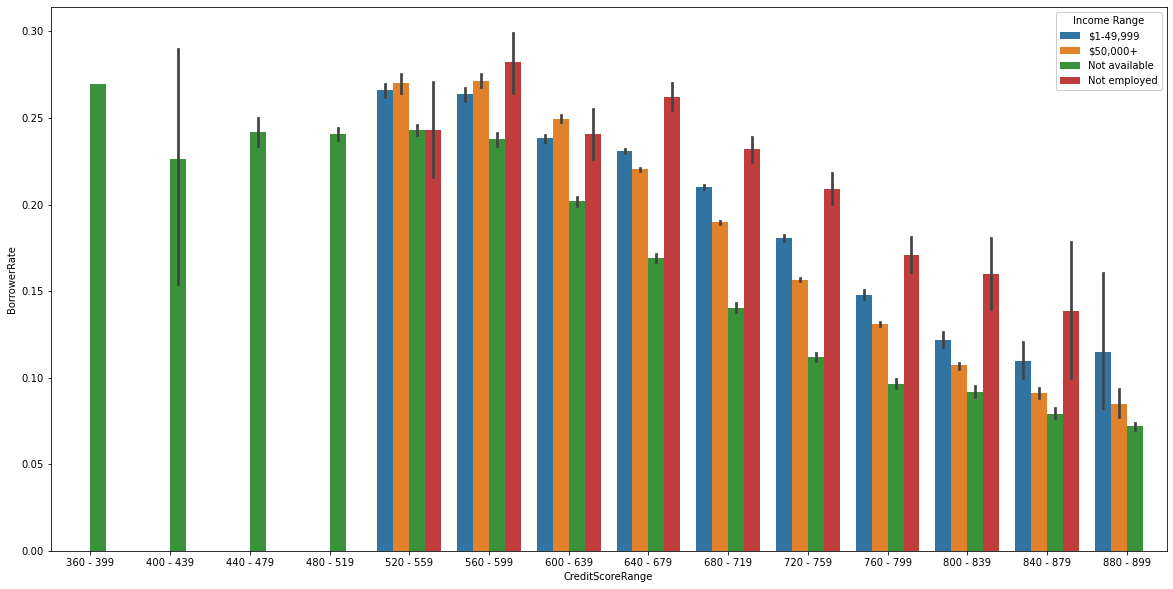

In [221]:
plt.figure(figsize=[20,10])
sns.barplot(data = df_graph1, x = 'CreditScoreRange', y = 'BorrowerRate', hue = 'IncomeRangeAlt')
plt.legend(loc = 1, ncol = 1, framealpha = 1, title = 'Income Range');

Simplifying these bar graphs help illustrate the relationship between Interest Rate and Credit Score.  Overall, the negative status items show a higher interest rate compared to its positive counterparts.  Surprisingly, looking at the lower credit score range (520-640), it shows higher income earners having a little higher interest rate comparted to their lower income counterparts.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I started out comparing three qualitative variables with interest rate being one of the three.  For the most part, it was a dead end and did not reveal much.  I then tried using two numeric variables compared with one categorical variable.  The only relationship that was present was employment duration vs interest rate where the credit score was between 520-640.  The final sets observed two categorical variables versus interest rate.  One showed a suprising trend when looking into homeownership as a factor when comparing interest rate and credit score.  The other bar plots are not too suprising and made sense.  I had to simplify three columns to visualize the bar graphs more clearly.

### Were there any interesting or surprising interactions between features?

The first interesting trend that there was a positive correlation looking at employment duration vs interest rate when a borrower's credit score falls between 520-640.  It shows a higher interest rate the longer a borrower has been employed, which surprised me.  The second thing that was interesting is looking at homeowner status when comparing credit score and interest rate.  For most of the credit card ranges, it shows a slightly lower interest rate for homeowners where the violin plot showed otherwise.